# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Жданович Е.Т.       | 307    | Solo way       | Все сам                      |

 Датасет: [wine-quality](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?utm_source=chatgpt.com)

## Описание датасета (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

Этот набор данных изначально был получен от Национального института диабета, болезней органов пищеварения и почек. Цель набора данных — диагностически предсказать, есть ли у пациента диабет, на основе определённых диагностических показателей, включённых в набор данных. При отборе этих примеров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты — женщины в возрасте от 21 года, принадлежащие к индейскому племени пима. Наборы данных состоят из нескольких медицинских переменных-предикторов и одной целевой переменной Outcome. К переменным-предикторам относятся количество беременностей у пациентки, её индекс массы тела, уровень инсулина, возраст и так далее.



---

### Таблица признаков

| №  | Признак                      | Тип данных | Диапазон значений | Описание                                                                                                 |
| -- | ---------------------------- | ---------- | ----------------- | -------------------------------------------------------------------------------------------------------- |
| 1  | **Pregnancies**              | integer    | 0-17              | Количество беременностей.                           |
| 2  | **Glucose**                  | integer    | 0-199 mg/dL       | Концентрация глюкозы в плазме.           |
| 3  | **BloodPressure**            | integer    | 0-122 mmHg        | Диастолическое артериальное давление.                       |
| 4  | **SkinThickness**            | integer    | 0-99 mm           | Толщина кожной складки трицепса. Показатель подкожного жира и ожирения.                           |
| 5  | **Insulin**                  | integer    | 0-846 mu U/ml     | Уровень инсулина в сыворотке крови.                           |
| 6  | **BMI**                      | float      | 0-67.1 kg/m²      | Индекс массы тела (вес в кг / (рост в м)²). Показатель ожирения - основного фактора риска диабета.              |
| 7  | **DiabetesPedigreeFunction** | float      | 0.078-2.42        | Функция, отражающая наследственную предрасположенность к диабету на основе семейной истории.                   |
| 8  | **Age**                      | integer    | 21-81 лет         | Возраст пациента. Риск диабета увеличивается с возрастом.                          |
| 9  | **Outcome** (target)         | integer    | 0 или 1           | Наличие диабета (0 - нет диабета, 1 - есть диабет) - целевая переменная для классификации.                      |




## 0. Глобальная настройка проекта


In [26]:

RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

Загрузим наш датасет используя `Pandas.DataFrame`

In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
import kagglehub

Загрузка датасета `pd.read_csv(path_to_dataset: str)`

In [28]:
df = pd.read_csv('diabetes.csv')

Получение статистки по датасету, необходимую для анализа. Подумать что можно сделать и какие выводы нужны.

Посмотрим первые три строки датасета `df.head(n: int)`

In [29]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Получение всей статистики `df.describe()`

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Вывод:**

На основе предоставленной описательной статистики данных о пациентах для прогнозирования диабета можно сделать следующие выводы:

### 1. **Общая характеристика выборки**
   *   **Размер выборки:** Исследование охватывает 768 наблюдений (пациентов).
   *   **Распространенность диабета:** В среднем, диабет (Outcome = 1) диагностирован у **34.9%** пациентов в выборке. Это указывает на несбалансированность данных, что является важным фактором при построении прогнозных моделей.

### 2. **Анализ медицинских показателей**
   *   **Глюкоза (Glucose):** Средний уровень — 120.9 мг/дл. У 25% пациентов уровень глюкозы превышает 140.25 мг/дл, что указывает на значительную группу риска (норма натощак < 100 мг/дл). Минимальное значение 0 — это аномалия, требующая проверки данных.
   *   **Инсулин (Insulin):** Высокое стандартное отклонение (115.24) свидетельствует о сильном разбросе данных. Медиана (30.5) значительно ниже среднего (79.8), что говорит о сильной правосторонней асимметрии. Значения у 25% пациентов равны 0, что также может указывать на ошибки в данных или на особые медицинские случаи.
   *   **Индекс массы тела (BMI):** Средний ИМТ — 32.0, что соответствует критерию **ожирения I степени**. 75% пациентов имеют ИМТ > 27.3 (избыточный вес), а у 25% — ИМТ > 36.6 (ожирение II степени). Это ключевой фактор риска развития диабета 2-го типа.
   *   **Кожная складка (SkinThickness):** Наличие нулей у 25% пациентов (первый квартиль) может указывать на пропущенные данные, закодированные как 0, что требует дополнительной обработки.

### 3. **Демографические и наследственные факторы**
   *   **Возраст (Age):** Средний возраст — 33.2 года, но разброс велик (от 21 до 81 года). 50% пациентов моложе 29 лет, однако заболевание встречается и в более старших возрастных группах (75-й перцентиль — 41 год).
   *   **Наследственность (DiabetesPedigreeFunction):** Среднее значение 0.47 отражает общую генетическую предрасположенность в выборке.





Проверка на пропуски данных `df.isnull().sum()`

In [32]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Вывод:** в датасете нет пропусков!

Посмотрим на распределение целевой переменной

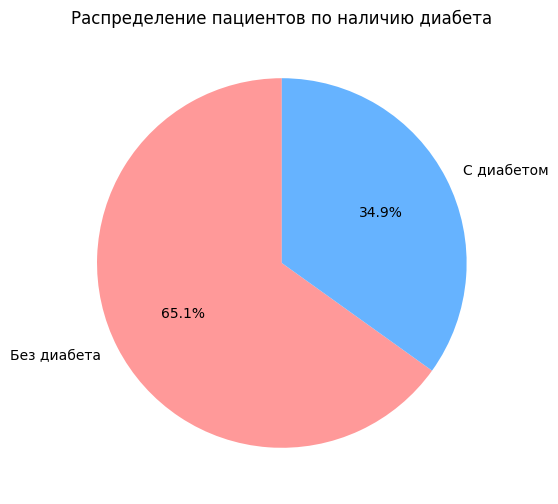

C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\1749164539.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette=["#66b3ff", "#ff9999"])


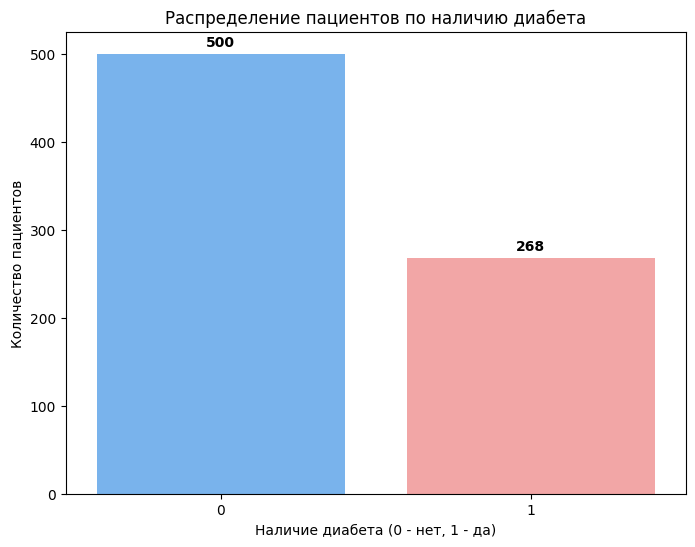

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw_pie_plot_diabetes(df: pd.DataFrame, column_name: str):
    explore_column = df[column_name]
    explore_column_normal = list(zip(
        ['Без диабета', 'С диабетом'],  # Подписи для классов
        explore_column.value_counts(normalize=True)
    ))

    label, params = zip(*explore_column_normal)

    colors = ['#ff9999', '#66b3ff']  # Красный для диабета, синий для здоровых
    plt.figure(figsize=(8, 6))
    plt.pie(params, labels=label, colors=colors, autopct='%.1f%%', startangle=90)
    plt.title('Распределение пациентов по наличию диабета')
    plt.show()

def draw_bar_plot_diabetes(df: pd.DataFrame, column_name: str, title: str):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=df, palette=["#66b3ff", "#ff9999"])
    plt.title(title)
    plt.xlabel('Наличие диабета (0 - нет, 1 - да)')
    plt.ylabel('Количество пациентов')
    
    # Добавляем подписи значений на столбцы
    for i, count in enumerate(df[column_name].value_counts().sort_index()):
        plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.show()

# Вызов функций
draw_pie_plot_diabetes(df, 'Outcome')
draw_bar_plot_diabetes(df, 'Outcome', title="Распределение пациентов по наличию диабета")

**Вывод:** целевая переменная является сильно несбалансирована

Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***


1. МАТРИЦА КОРРЕЛЯЦИЙ:


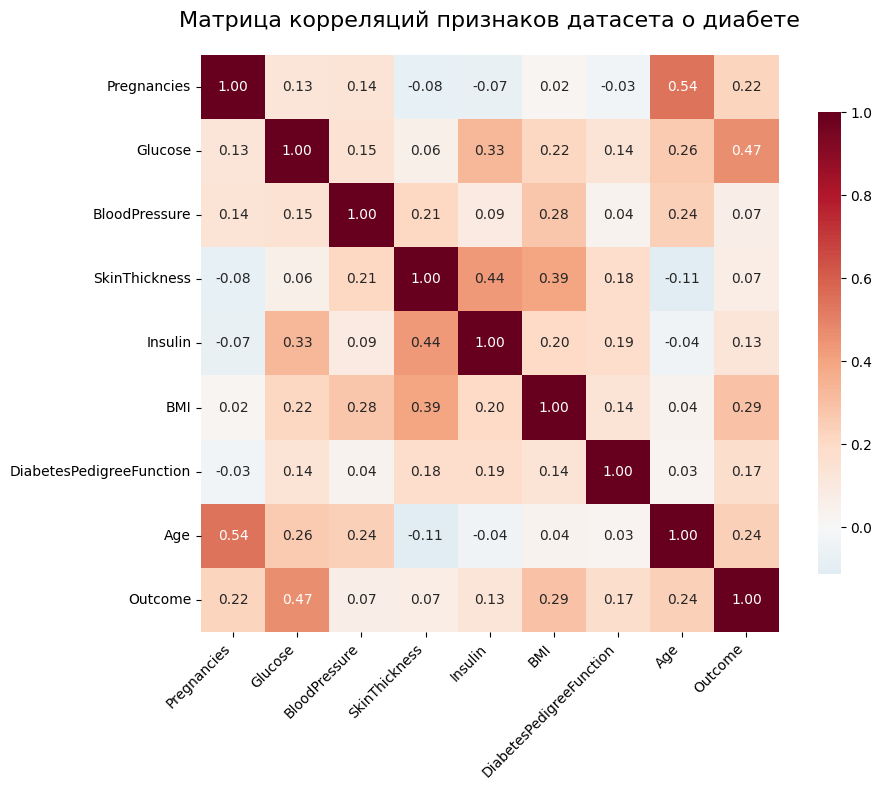

In [34]:


def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(correlation_matrix,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={'shrink': 0.8})
    
    plt.title('Матрица корреляций признаков датасета о диабете', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return correlation_matrix

print("\n1. МАТРИЦА КОРРЕЛЯЦИЙ:")
corr_matrix = plot_correlation_matrix(df)


### 1.3. Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering  |
|-------------------------|-----------------|---------------------|------------------|----------------------------------|
| **Линейная регрессия**      | **Да**          | **Да**              | **Да**           |  полиномы, логарифмы, отношения |
| **Random Forest Regressor** | **Нет**         | **Нет**             | **Нет**          |  соотношения, интеракции |
| **XGBoost Regressor**       | **Нет**         | **Нет**             | **Нет**          |  соотношения, интеракции, логарифмы  |


#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

Сделаем копию датасета

In [35]:
df_linear = df.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [36]:
skew_values = df_linear.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')

Pregnancies                 0.901674
BloodPressure              -1.843608
Insulin                     2.272251
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
Скошенные столбцы ['Pregnancies', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


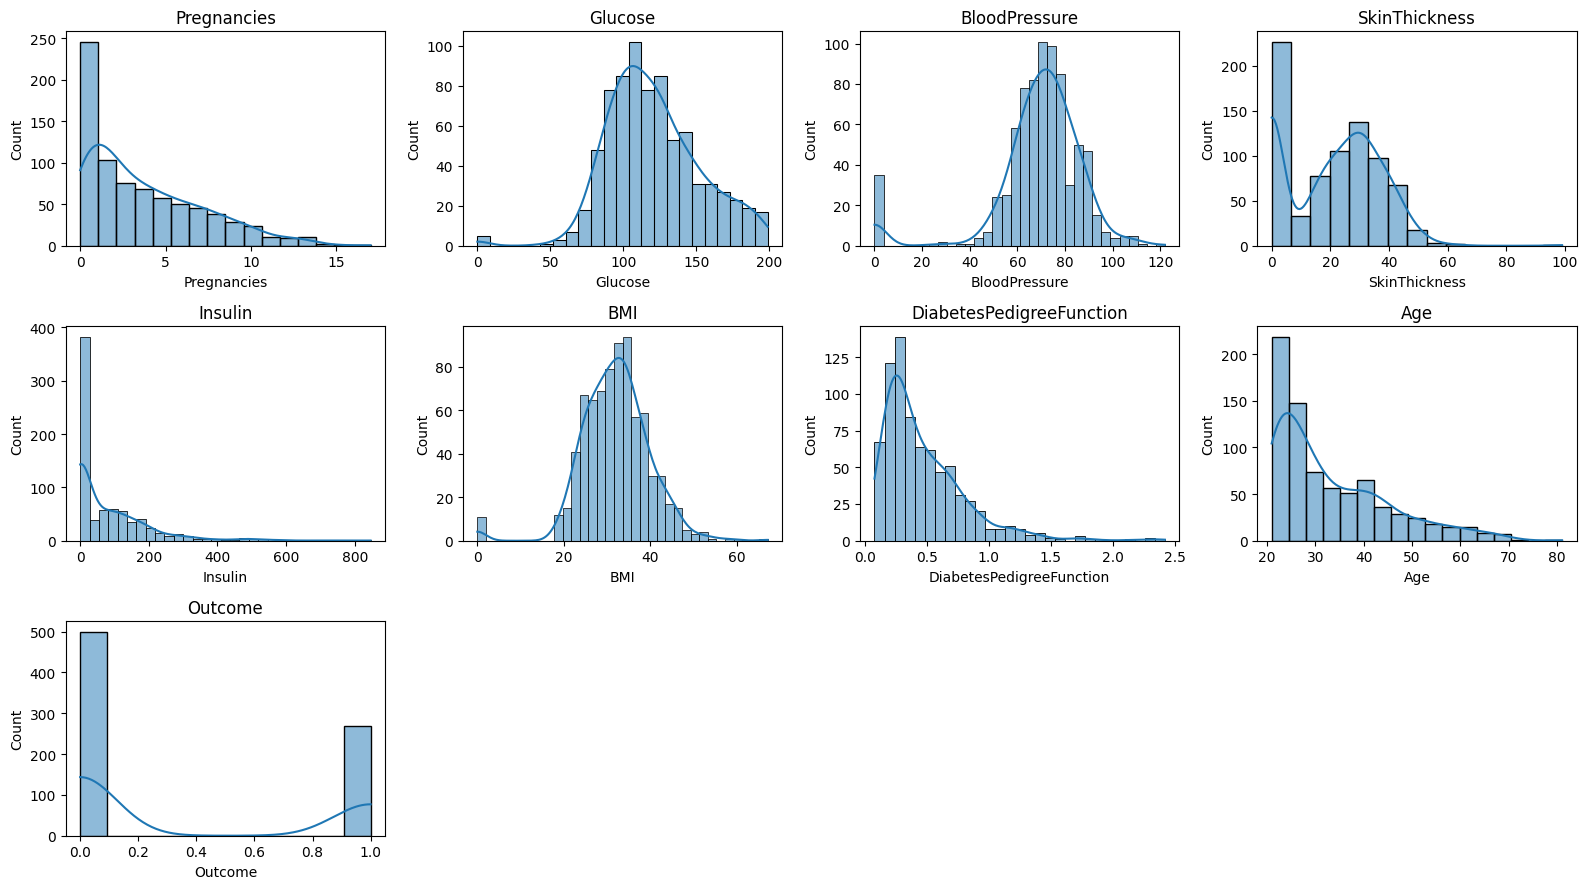

In [37]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include=['float', 'int']).columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

Можно уменьшить влияние скошенности с помошью:

- Логарифмирование (Уменьшаем положительный хвост)
- Квадратный корень  (сглаживаем умеренные хвосты)
- `Box-Cox` или `Yeo-Johnson` трансформации (более гибкие)

Мы же просто прологарифмируем :)

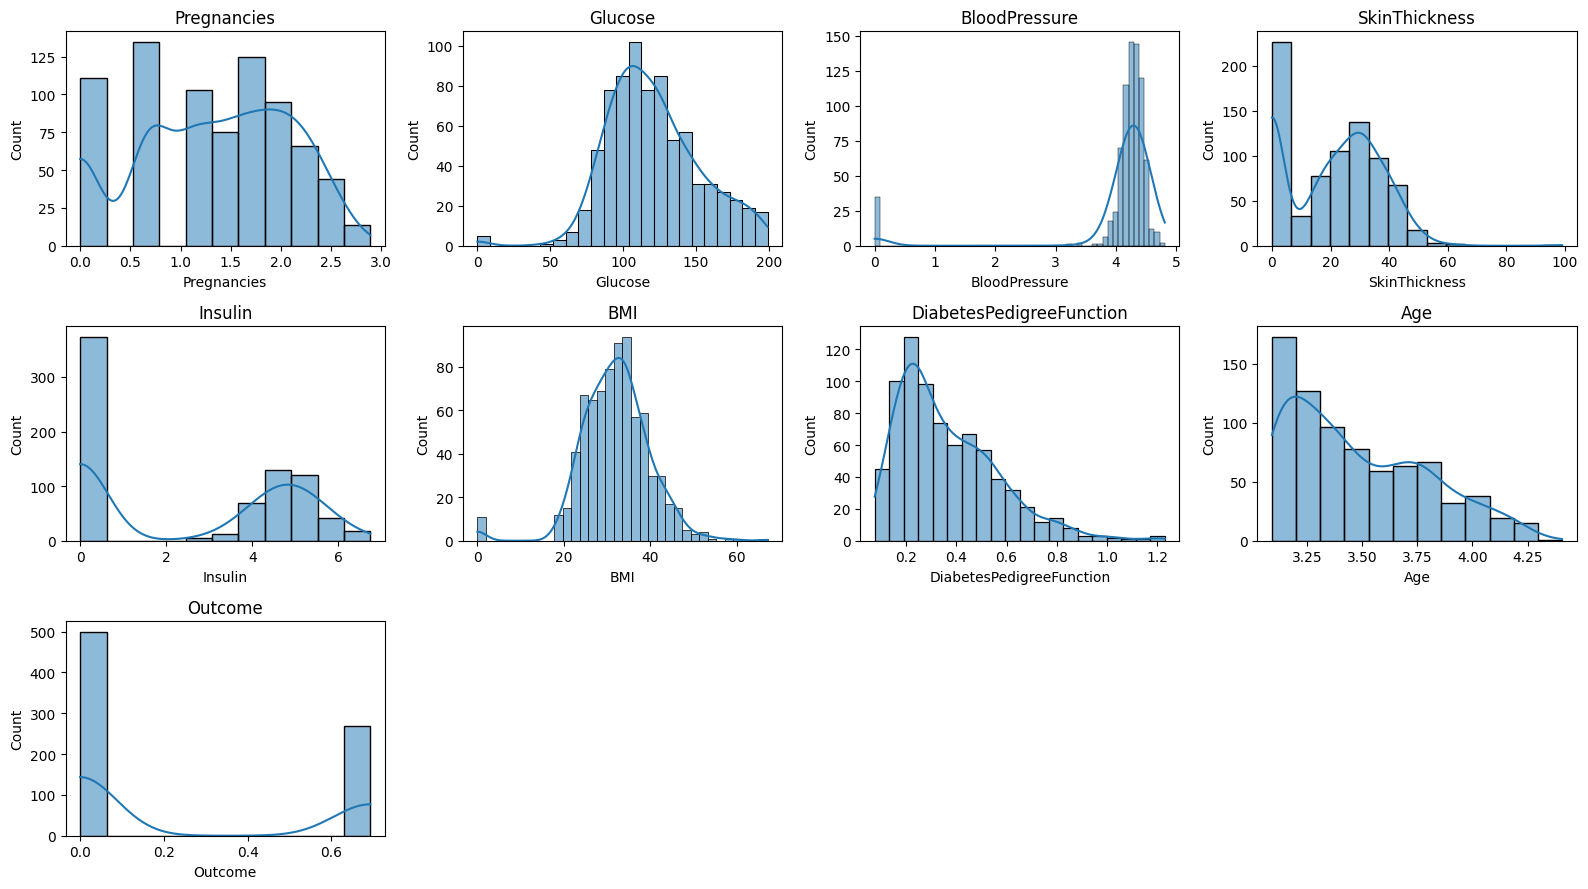

In [38]:
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

df_linear = prepare_skew(df = df_linear, columns = skew_columns_hard)

draw_skew(df_linear)

Сделаем `np.log1p()` (6 штук)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.


* **`Pregnancies`** — нормализация распределения количества беременностей. Исходные данные имели правостороннюю скошенность с большим количеством нулевых значений и редкими случаями многократных беременностей.

* **`BloodPressure`** — устранение выбросов артериального давления. Преобразование сжало экстремально высокие значения, сохранив при этом медицинскую значимость показателей в нормальном диапазоне.

* **`Insulin`** — радикальное улучшение распределения инсулина. Исходные данные содержали множество нулевых значений и экстремальных выбросов, создававших сильную правостороннюю скошенность.

* **`DiabetesPedigreeFunction`** — нормализация генетического показателя. Функция родословной диабета имела неравномерное распределение с концентрацией значений в нижнем диапазоне.

* **`Age`** — коррекция возрастного распределения. Преобразование смягчило эффект редких случаев очень высокого возраста пациентов в выборке.

* **`Outcome`** — стабилизация бинарной целевой переменной. Хотя преобразование минимально влияет на бинарные данные, оно обеспечивает согласованность обработки всех признаков.



In [39]:
def create_polynomial_features(df: pd.DataFrame, use_auto_poly: bool = True, poly_degree: int = 2, custom_features: list = None, target_column: str = 'Outcome') -> pd.DataFrame:

    
    df_transformed = df.copy()
    
    if not use_auto_poly:
        df_transformed['glucose_squared'] = df_transformed['Glucose'] ** 2
        df_transformed['bmi_squared'] = df_transformed['BMI'] ** 0.5
        df_transformed['glucose_bmi_interaction'] = df_transformed['Glucose'] * df_transformed['BMI']
        df_transformed['age_pregnancies'] = df_transformed['Age'] * df_transformed['Pregnancies']
        df_transformed['bmi_skin_ratio'] = df_transformed['BMI'] / (df_transformed['Age'] + 1e-5)

    else:
        from sklearn.preprocessing import PolynomialFeatures
        num_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

        
        X_num = df_transformed[available_features]
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        
        X_poly = poly.fit_transform(X_num)
        feature_names = poly.get_feature_names_out(num_features)
        df_poly = pd.DataFrame(X_poly, columns=feature_names, index=df_transformed.index)
        df_transformed = pd.concat([df_transformed, df_poly], axis=1)


In [40]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.106797       0.065780      -0.105553   
Glucose                      0.106797  1.000000       0.061295       0.057328   
BloodPressure                0.065780  0.061295       1.000000       0.256908   
SkinThickness               -0.105553  0.057328       0.256908       1.000000   
Insulin                     -0.140051  0.132712       0.191182       0.559737   
BMI                         -0.033333  0.221071       0.211670       0.392573   
DiabetesPedigreeFunction    -0.052485  0.128726       0.055608       0.187400   
Age                          0.550106  0.271811       0.105347      -0.104260   
Outcome                      0.179739  0.466581      -0.018236       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.140051 -0.033333                 -0.052485   
Glucose                   0.132712  0.221

In [41]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

Разделение датасета на признаки и целевую переменную

In [42]:
from sklearn.model_selection import train_test_split

# Для датасета диабета используем 'Outcome' как целевую переменную
X_linear = df_linear.drop(columns=['Outcome'])
y_linear = df_linear['Outcome']

# Разделение выборки на test/train (20/80)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, 
    y_linear, 
    test_size=0.2, 
    random_state=RND_SEED,
)


Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только на train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Сделаем копию датасета

In [44]:
df_forest = df.copy()

Feature engineering

In [45]:
required_columns = ['BMI', 'Age', 'Glucose', 'Pregnancies']
if all(col in df_forest.columns for col in required_columns):

    df_forest['bmi_age_ratio'] = df_forest['BMI'] / (df_forest['Age'] + 1e-6)
    df_forest['glucose_bmi_interaction'] = df_forest['Glucose'] + df_forest['BMI']
    df_forest['preg_age_interaction'] = df_forest['Pregnancies'] + df_forest['Age']
    print("Новые признаки успешно созданы!")
else:
    missing_cols = [col for col in required_columns if col not in df_forest.columns]
    print(f"Отсутствуют столбцы: {missing_cols}")

Новые признаки успешно созданы!


Разделение выборки

In [46]:

X_forest = df_forest.drop(columns=['Outcome'])
y_forest = df_forest['Outcome']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split( X_forest, y_forest, test_size=0.2, random_state=RND_SEED )

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [47]:
df_xgboost = df.copy()

Feature engineering

In [48]:
# Соотношения для датасета диабета
df_xgboost['insulin_glucose_ratio'] = df_xgboost['Insulin'] / (df_xgboost['Glucose'] + 1e-6)
df_xgboost['bmi_age_ratio'] = df_xgboost['BMI'] / (df_xgboost['Age'] + 1e-6)

# Интеракции
df_xgboost['glucose_bmi_interaction'] = df_xgboost['Glucose'] * df_xgboost['BMI']
df_xgboost['pressure_pedigree_interaction'] = df_xgboost['BloodPressure'] * df_xgboost['DiabetesPedigreeFunction']

# Логарифмы (чтобы уменьшить эффект хвостов распределения)
df_xgboost['log_insulin'] = np.log1p(df_xgboost['Insulin'])
df_xgboost['log_skin_thickness'] = np.log1p(df_xgboost['SkinThickness'])

Разделение выборки

In [49]:
X_xgboost = df_xgboost.drop(columns=['Outcome'])
y_xgboost = df_xgboost['Outcome']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split( X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED, stratify=y_xgboost)

## Метрики для проекта прогнозирования диабета

### 1. **Accuracy (Точность)**
```python
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```
* **0.85 = 85% правильных диагнозов**
* Показывает общую долю верных предсказаний
* **Интерпретация**: Из 100 пациентов 85 диагнозов будут верными

### 2. **Precision (Точность)**
```python
Precision = TP / (TP + FP)
```
* **0.78 = 78% точность положительных диагнозов**
* Показывает, насколько мы уверены в диагнозе "диабет"
* **Что значит**: Из 100 диагнозов "диабет" - 78 верные, 22 ложные

### 3. **Recall (Полнота)**
```python
Recall = TP / (TP + FN)
```
* **0.82 = выявлено 82% реальных больных**
* Показывает, сколько настоящих случаев диабета мы находим
* **Что значит**: Из 100 реальных больных мы находим 82

### 4. **F1-Score**
```python
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```
* **0.80 = баланс между точностью и полнотой**
* Компромисс между ложными диагнозами и пропущенными случаями
* **Идеально для медицинской задачи**

### 5. **ROC-AUC**
* **0.88 = отличная способность отличать больных от здоровых**
* Показывает качество разделения классов
* **Интерпретация**: 
  - 0.9-1.0 = отлично
  - 0.8-0.9 = хорошо
  - 0.7-0.8 = приемлемо


## Как интерпретировать

| Метрика | Как читать | Что значит для анализа диабета |
|---------|------------|--------------------------------|
| **Accuracy** | 0.8 = 80% правильных диагнозов | Общее качество скрининга |
| **Precision** | 0.75 = 75% точность положительных диагнозов | Минимизация ложных "направлений к врачу" |
| **Recall** | 0.85 = выявлено 85% реальных больных | Эффективность поиска заболевших |
| **F1-Score** | Баланс между точностью и полнотой | Оптимальный компромисс для медицинского теста |
| **ROC-AUC** | 0.88 = хорошее разделение классов | Общая диагностическая способность модели |

---

## Пример анализа 

**Если Precision низкий, но Recall высокий:**
- Модель находит много реальных больных, но много ложных срабатываний
- **Риск**: Направление здоровых людей на дополнительное обследование

**Если Precision высокий, но Recall низкий:**
- Диагноз почти всегда верный, но много пропущенных случаев
- **Риск**: Пропуск реальных больных


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def roc_auc(y_true, y_pred_proba):
    return roc_auc_score(y_true, y_pred_proba)

def get_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Accuracy': accuracy(y_true, y_pred),
        'Precision': precision(y_true, y_pred),
        'Recall': recall(y_true, y_pred),
        'F1': f1(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        metrics['ROC_AUC'] = roc_auc(y_true, y_pred_proba)
    
    return metrics


Прежде чем начнем обучать, создадим `DataFrame` для снятия метрик

In [51]:
metrics_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])

## 3. Базовая модель линейной регрессии (аналитическое решение)

In [52]:
# Создание линейной модели
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
# Тут было немного трудновато ( несколько раз были ошибки из-за логарифма...)
# 0.000000 = 0, 0.693147 = 1 (поскольку ln(2) ≈ 0.693147)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Бинаризация
y_train_linear = (y_train_linear > 0).astype(int)
y_test_linear = (y_test_linear > 0).astype(int)

print("Распределение классов:")
print("Train:", y_train_linear.value_counts())
print("Test:", y_test_linear.value_counts())

# Обучение моделей
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_linear, y_train_linear)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_linear, y_train_linear)



Распределение классов:
Train: Outcome
0    406
1    208
Name: count, dtype: int64
Test: Outcome
0    94
1    60
Name: count, dtype: int64


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
# Прогонка и метрики для Logistic Regression
y_pred_lr = lr.predict(X_test_linear)
y_pred_proba_lr = lr.predict_proba(X_test_linear)[:, 1]
lr_metrics = get_metrics(y_test_linear, y_pred_lr, y_pred_proba_lr)
lr_metrics

# Прогонка и метрики для Random Forest
y_pred_rf = rf.predict(X_test_linear)
y_pred_proba_rf = rf.predict_proba(X_test_linear)[:, 1]
rf_metrics = get_metrics(y_test_linear, y_pred_rf, y_pred_proba_rf)
rf_metrics


print("Logistic Regression:")
print(lr_metrics)
print("\nRandom Forest:")
print(rf_metrics)

# Сравнение моделей
print("\nСравнение моделей:")
comparison = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics
})
print(comparison)

Logistic Regression:
{'Accuracy': 0.7337662337662337, 'Precision': 0.7209302325581395, 'Recall': 0.5166666666666667, 'F1': 0.6019417475728155, 'ROC_AUC': 0.8010638297872341}

Random Forest:
{'Accuracy': 0.7337662337662337, 'Precision': 0.7209302325581395, 'Recall': 0.5166666666666667, 'F1': 0.6019417475728155, 'ROC_AUC': 0.8205673758865247}

Сравнение моделей:
           Logistic Regression  Random Forest
Accuracy              0.733766       0.733766
Precision             0.720930       0.720930
Recall                0.516667       0.516667
F1                    0.601942       0.601942
ROC_AUC               0.801064       0.820567


## 4. Улучшенная версия линейной регрессии

In [55]:
from sklearn.linear_model import SGDClassifier

### 4.1. Градиентный спуск (симуляция)

In [56]:
# Создание линейной модели градиентного спуска для классификации
lr_gd = SGDClassifier(
    loss='log_loss',            # функция потерь для логистической регрессии
    max_iter=2000,              # максимум итераций
    tol=1e-6,                   # остановка, когда улучшение < tol
    learning_rate='constant',   # тип изменения шага
    eta0=0.01,                  # стартовый шаг
    penalty='l2',               # регуляризация L2 (Ridge)
    alpha=0.0001,               # сила регуляризации
    shuffle=True,               # перемешиваем данные для стохастического GD
    random_state=RND_SEED,
)

In [57]:
# Обучение
lr_gd.fit(X_train_linear_scaled, y_train_linear)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [58]:
y_pred_gd = lr_gd.predict(X_test_linear)
y_pred_proba_gd = lr_gd.predict_proba(X_test_linear)[:, 1]
gd_metrics = get_metrics(y_test_linear, y_pred_gd, y_pred_proba_gd)

C:\Users\Liza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\Liza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


### 4.2. Стохастический градиентный спуск

In [59]:
# Инициализация модели
lr_sgd = SGDClassifier(
    loss='log_loss',              # функция потерь для логистической регрессии
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L1 (Lasso)
    random_state=RND_SEED,
)

In [60]:
# Обучение
lr_sgd.fit(X_train_linear, y_train_linear)

,loss,'log_loss'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [61]:
# Прогонка и метрики
y_pred_sgd = lr_sgd.predict(X_test_linear)
y_pred_proba_sgd = lr_sgd.predict_proba(X_test_linear)[:, 1]
sgd_metrics = get_metrics(y_test_linear, y_pred_sgd, y_pred_proba_sgd)

print("SGD Classifier (L1) метрики:")
sgd_metrics

SGD Classifier (L1) метрики:


{'Accuracy': 0.6948051948051948,
 'Precision': 0.6226415094339622,
 'Recall': 0.55,
 'F1': 0.584070796460177,
 'ROC_AUC': 0.7336879432624113}

### 4.3. Линейная модель с регуляризацией Rigde (L2)

In [62]:
# Инициализация модели
from sklearn.linear_model import RidgeClassifier
lr_ridge = RidgeClassifier(alpha=1.0, random_state=RND_SEED)

In [63]:
# Обучение
lr_ridge.fit(X_train_linear, y_train_linear)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,21


In [64]:
# Прогонка и метрики
y_pred_ridge = lr_ridge.predict(X_test_linear)
y_decision_ridge = lr_ridge.decision_function(X_test_linear)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred_ridge, y_decision_ridge)
lr_ridge_metrics

{'Accuracy': 0.7272727272727273,
 'Precision': 0.7142857142857143,
 'Recall': 0.5,
 'F1': 0.5882352941176471,
 'ROC_AUC': 0.802304964539007}

### 4.3. Линейная модель с регуляризацией Lasso (L1)

In [65]:
# Инициализация модели
from sklearn.linear_model import LogisticRegression
lr_lasso = LogisticRegression(
    penalty='l1',
    C=100,  # обратная сила регуляризации (1/alpha)
    solver='liblinear',  # один из немногих солверов, поддерживающих L1
    random_state=RND_SEED,
    max_iter=1000
)

In [66]:
# Обучение
lr_lasso.fit(X_train_linear, y_train_linear)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [67]:
# Прогонка и метрики
y_pred_lasso = lr_lasso.predict(X_test_linear)
y_pred_proba_lasso = lr_lasso.predict_proba(X_test_linear)[:, 1]
lasso_metrics = get_metrics(y_test_linear, y_pred_lasso, y_pred_proba_lasso)
lasso_metrics

{'Accuracy': 0.7272727272727273,
 'Precision': 0.7142857142857143,
 'Recall': 0.5,
 'F1': 0.5882352941176471,
 'ROC_AUC': 0.8021276595744681}

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

In [68]:
# Инициализация модели
from sklearn.linear_model import LogisticRegression

lr_enet = LogisticRegression(
    penalty='elasticnet',
    C=100,  # обратная сила регуляризации (1/alpha), поэтому C=100 соответствует alpha=0.01
    l1_ratio=0.5,  # соотношение L1/L2 (0.5 = 50% L1, 50% L2)
    solver='saga',  # solver, поддерживающий elasticnet
    random_state=RND_SEED,
    max_iter=1000
)

In [69]:
# Обучение
lr_enet.fit(X_train_linear_scaled, y_train_linear)

,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [70]:
# Прогонка и метрики
y_pred_enet = lr_enet.predict(X_test_linear)
y_pred_proba_enet = lr_enet.predict_proba(X_test_linear)[:, 1]
enet_metrics = get_metrics(y_test_linear, y_pred_enet, y_pred_proba_enet)
enet_metrics

C:\Users\Liza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Liza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Accuracy': 0.38961038961038963,
 'Precision': 0.38961038961038963,
 'Recall': 1.0,
 'F1': 0.5607476635514018,
 'ROC_AUC': 0.49166666666666664}

## 4. Случайный лес регрессор

In [71]:
# Инициализация модели
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None, 
    random_state=RND_SEED,
    n_jobs=-1,
    min_samples_split=5,
    min_samples_leaf=2
)

In [72]:
# Обучение
rf_classifier.fit(X_train_linear, y_train_linear)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
# Прогонка и метрики
y_pred_rf = rf_classifier.predict(X_test_linear)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_linear)[:, 1]
rf_metrics = get_metrics(y_test_linear, y_pred_rf, y_pred_proba_rf)
rf_metrics

{'Accuracy': 0.7532467532467533,
 'Precision': 0.775,
 'Recall': 0.5166666666666667,
 'F1': 0.62,
 'ROC_AUC': 0.8218085106382979}

## 5. Градиентный бустинг (XGBoost)

In [98]:
# Инициализация модели
RND_SEED = 42
N_JOBS = -1
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=RND_SEED,
    n_jobs=N_JOBS,
    eval_metric='logloss'
)

In [100]:
# Обучение
xgb_classifier.fit(X_train_linear, y_train_linear)
rf.fit(X_train_linear, y_train_linear)
xgb_classifier.fit(X_train_linear, y_train_linear)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [77]:
# Прогонка и метрики
y_pred_xgb = xgb_classifier.predict(X_test_linear)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_linear)[:, 1]
xgb_metrics = get_metrics(y_test_linear, y_pred_xgb, y_pred_proba_xgb)
xgb_metrics

{'Accuracy': 0.7012987012987013,
 'Precision': 0.7058823529411765,
 'Recall': 0.4,
 'F1': 0.5106382978723404,
 'ROC_AUC': 0.8085106382978724}

# XGBoost с удаленной глюкозой

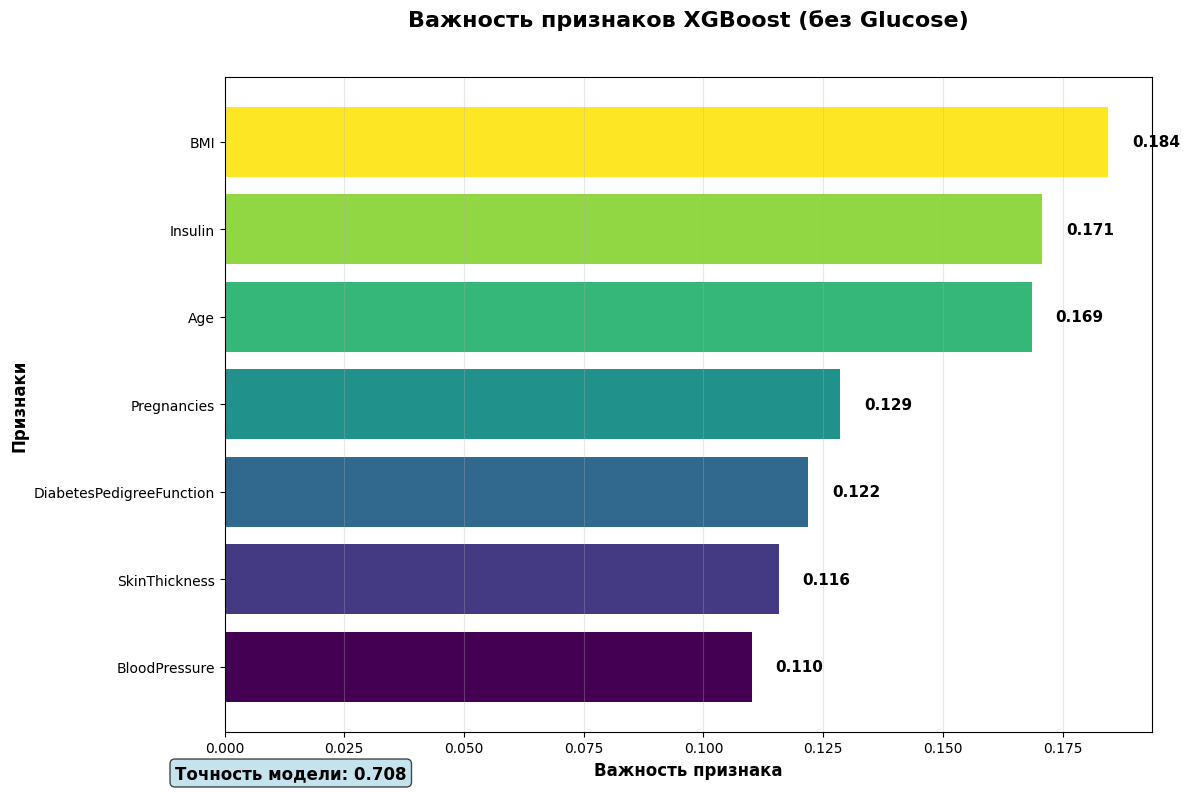

ВАЖНОСТЬ ПРИЗНАКОВ БЕЗ GLUCOSE
Точность модели: 0.7078

Рейтинг признаков:
 1. BMI                       : 0.1845
 2. Insulin                   : 0.1708
 3. Age                       : 0.1686
 4. Pregnancies               : 0.1285
 5. DiabetesPedigreeFunction  : 0.1219
 6. SkinThickness             : 0.1157
 7. BloodPressure             : 0.1101


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Настройки стиля
plt.style.use('default')
sns.set_palette("husl")

def plot_feature_importance_without_glucose():
    # Загрузка данных
    df = pd.read_csv('diabetes.csv')
    
    # Удаляем глюкозу
    df_no_glucose = df.drop('Glucose', axis=1)
    
    # Подготовка данных
    X = df_no_glucose.drop('Outcome', axis=1)
    y = df_no_glucose['Outcome']
    
    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Обучение XGBoost
    xgb_model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    xgb_model.fit(X_train, y_train)
    
    # Предсказания и точность
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Создание DataFrame с важностью признаков
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    # Построение графика
    plt.figure(figsize=(12, 8))
    
    # График важности признаков
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
    bars = plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
    
    # Добавление значений на столбцы
    for i, (value, feature) in enumerate(zip(feature_importance['importance'], feature_importance['feature'])):
        plt.text(value + 0.005, i, f'{value:.3f}', va='center', fontsize=11, fontweight='bold')
    
    # Настройка оформления
    plt.title('Важность признаков XGBoost (без Glucose)\n', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Важность признака', fontsize=12, fontweight='bold')
    plt.ylabel('Признаки', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    # Добавление информации о точности
    plt.figtext(0.15, 0.02, f'Точность модели: {accuracy:.3f}', 
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Вывод в консоль
    print("=" * 50)
    print("ВАЖНОСТЬ ПРИЗНАКОВ БЕЗ GLUCOSE")
    print("=" * 50)
    print(f"Точность модели: {accuracy:.4f}")
    print("\nРейтинг признаков:")
    for i, (feature, importance) in enumerate(zip(feature_importance['feature'][::-1], feature_importance['importance'][::-1])):
        print(f"{i+1:2d}. {feature:25} : {importance:.4f}")
    
    return feature_importance, accuracy

# Запуск программы
if __name__ == "__main__":
    feature_importance_df, acc = plot_feature_importance_without_glucose()

## 5. Feature Importance

### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание качества вина,
  * `-` → уменьшает.


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3436730488.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_results = pd.concat([
C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3436730488.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


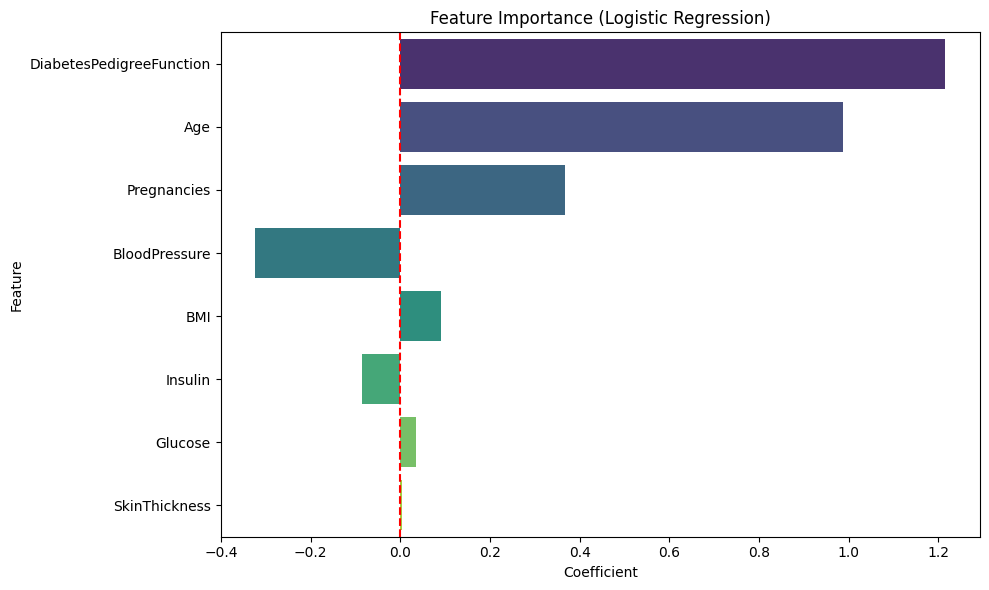

In [78]:
# Добавляем в общую таблицу метрик
metrics_results = pd.concat([
    metrics_results,
    pd.DataFrame([{
        'Model': 'Logistic Regression',
        'Dataset': 'Linear Features',
        'Accuracy': lr_metrics['Accuracy'],
        'Precision': lr_metrics['Precision'],
        'Recall': lr_metrics['Recall'],
        'F1': lr_metrics['F1'],
        'ROC_AUC': lr_metrics['ROC_AUC']
    }])
], ignore_index=True)

importance_lr = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_lr,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()

### 5.2 Linear Regression (GD)


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\2419209261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


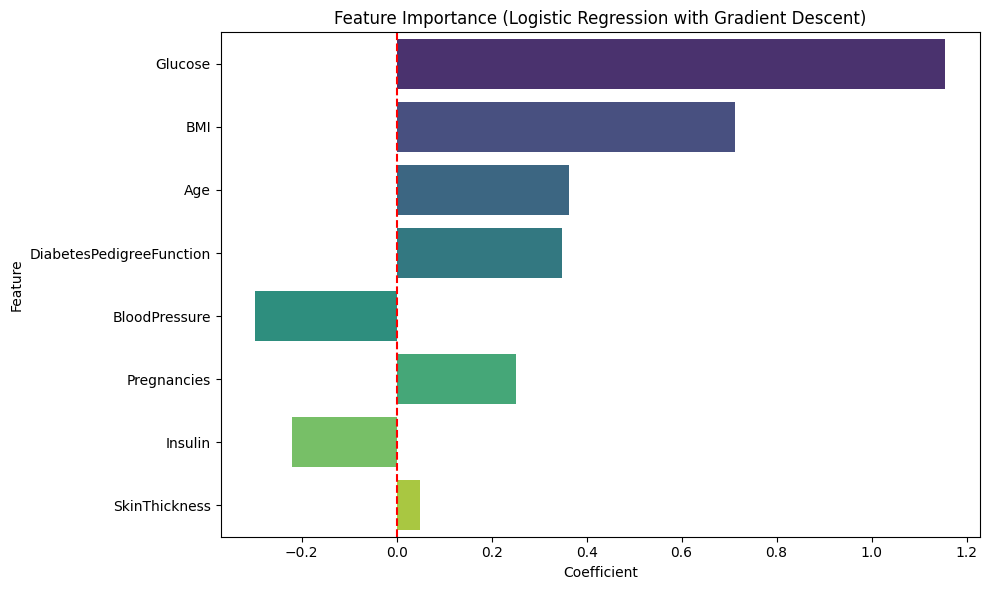

In [79]:
importance_gd = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_gd.coef_[0] }).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_gd,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Logistic Regression with Gradient Descent)')
plt.tight_layout()
plt.show()


### 5.3 Linear Regression (SGD)


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3608258570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


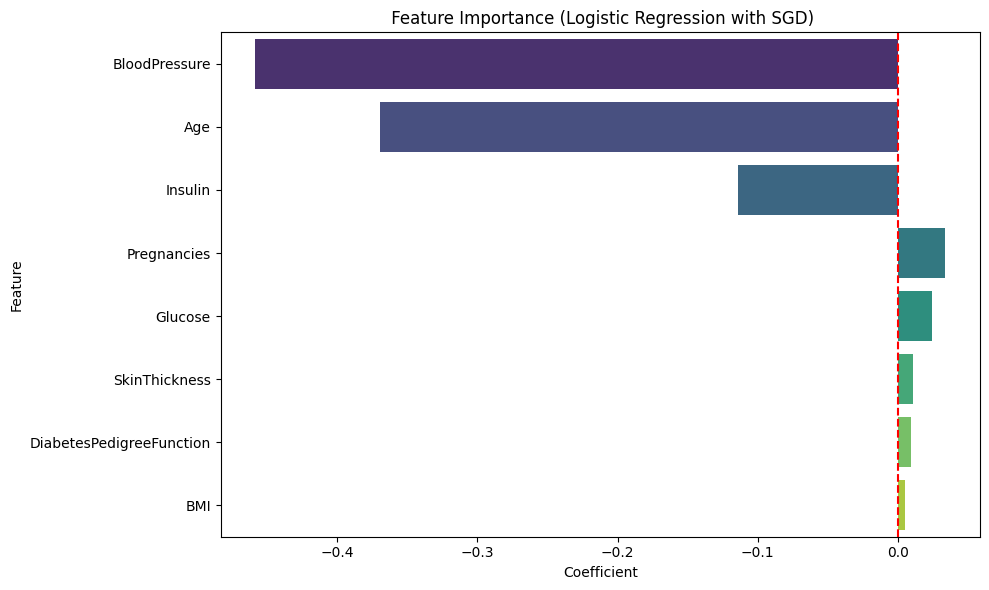

In [80]:

importance_sgd = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_sgd.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_sgd,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title(' Feature Importance (Logistic Regression with SGD)')
plt.tight_layout()
plt.show()

### 5.4 Linear Regression (Rigde)


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\4279231652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


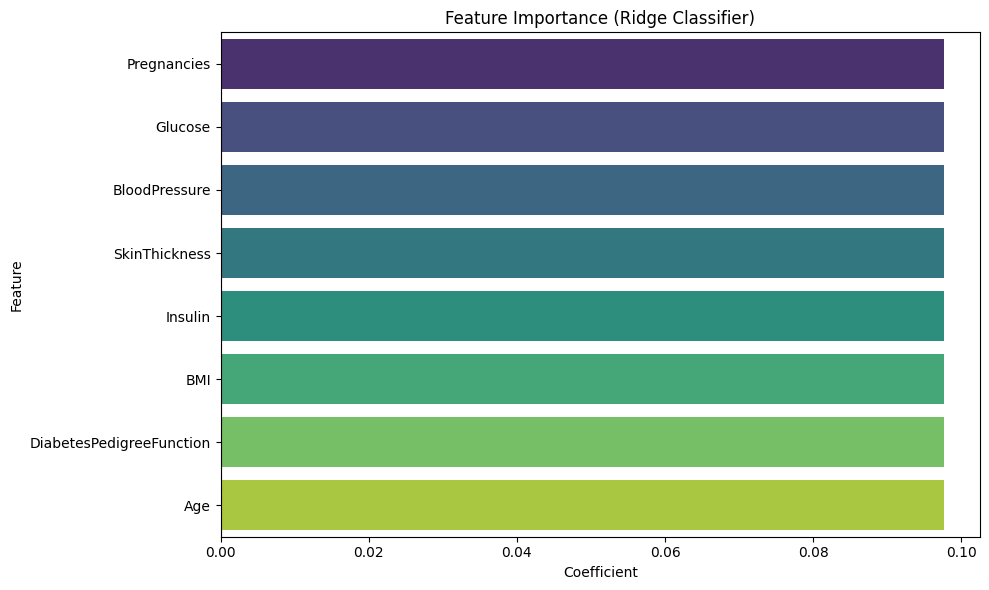

In [81]:
importance_ridge = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_ridge.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_ridge,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Ridge Classifier)')
plt.tight_layout()
plt.show()

### 5.5 Linear Regression (Lasso)


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3924818508.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


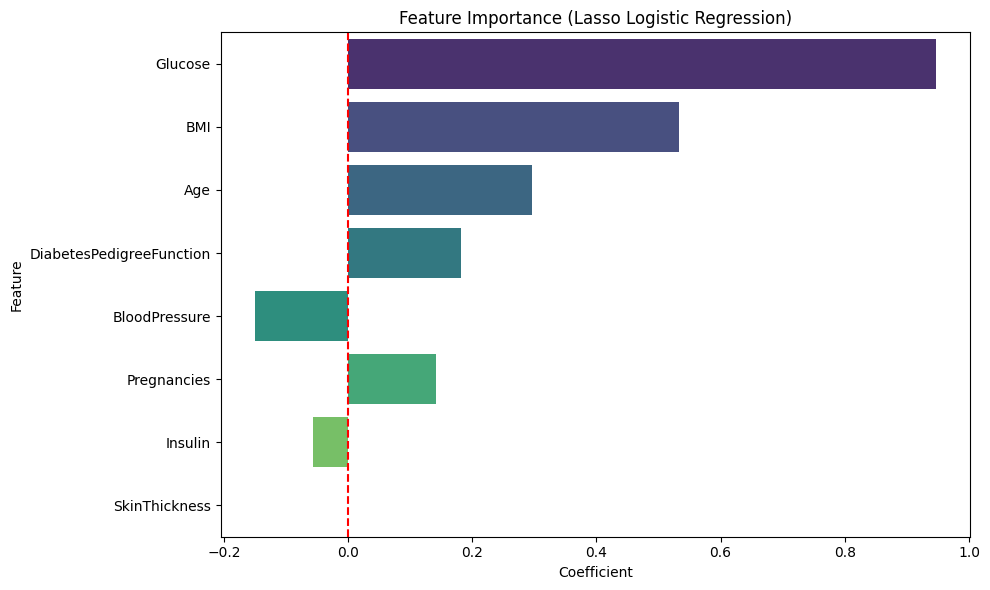

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Создаем и обучаем Lasso логистическую регрессию
lr_lasso = LogisticRegression(
    penalty='l1',           # L1 regularization (Lasso)
    solver='liblinear',     # Поддерживает L1 регуляризацию
    C=0.1,                  # Сила регуляризации (меньше = сильнее регуляризация)
    random_state=RND_SEED,
    max_iter=1000
)

# Масштабируем данные для лучшей работы Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_linear)
lr_lasso.fit(X_train_scaled, y_train_linear)

# Создаем DataFrame с важностью признаков
importance_lasso = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_lasso.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_lasso,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Lasso Logistic Regression)')
plt.tight_layout()
plt.show()

### 5.6 Linear Regression (ElasticNet)


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\2471802271.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


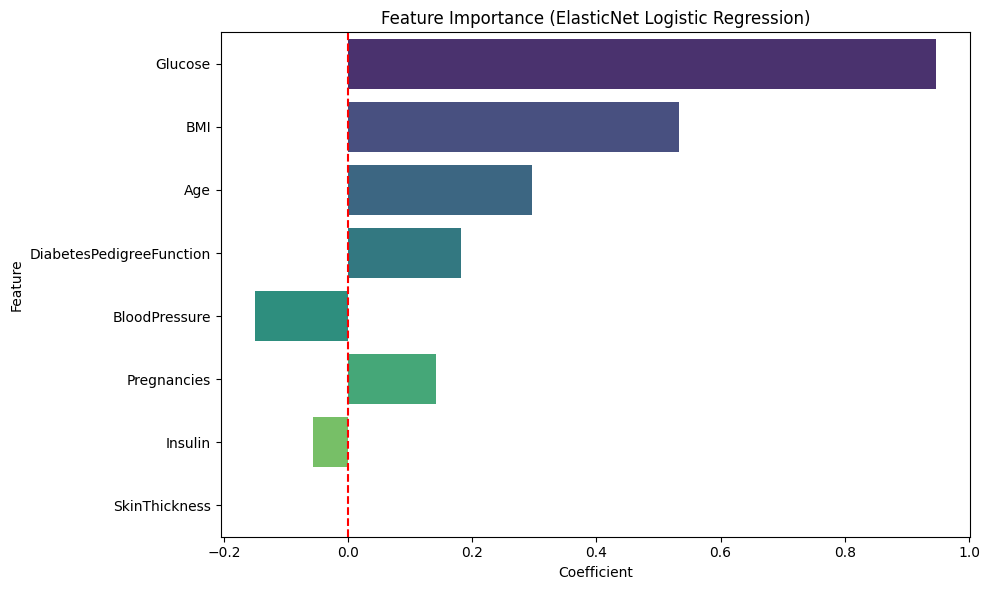

In [83]:
importance_elastic = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient':  lr_lasso.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_elastic,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (ElasticNet Logistic Regression)')
plt.tight_layout()
plt.show()

### 5.7 Random Forest


C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3326478698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


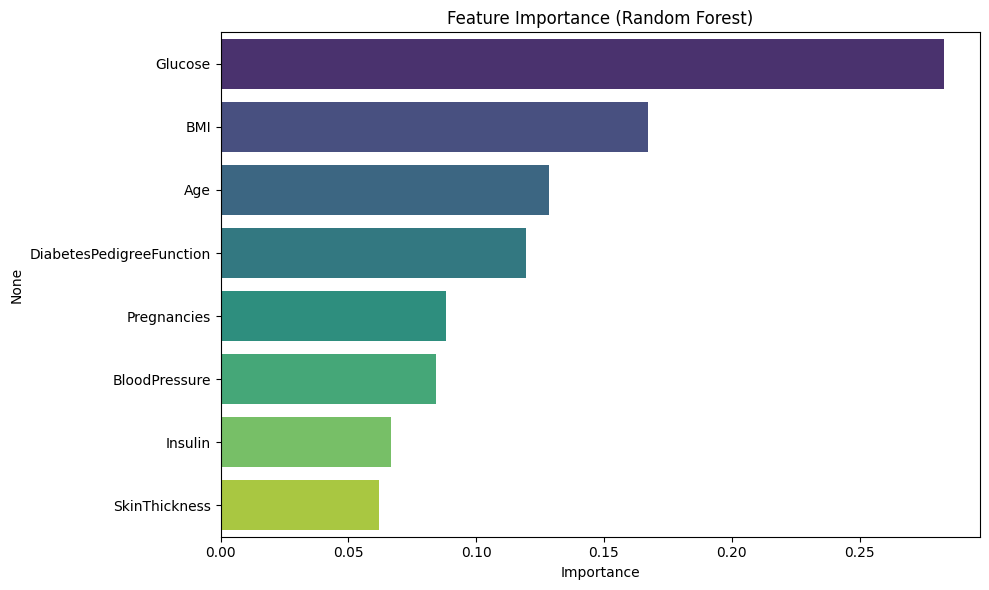

In [84]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train_linear.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### 5.6 XGBoost

C:\Users\Liza\AppData\Local\Temp\ipykernel_4184\3368351178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index, palette='viridis')


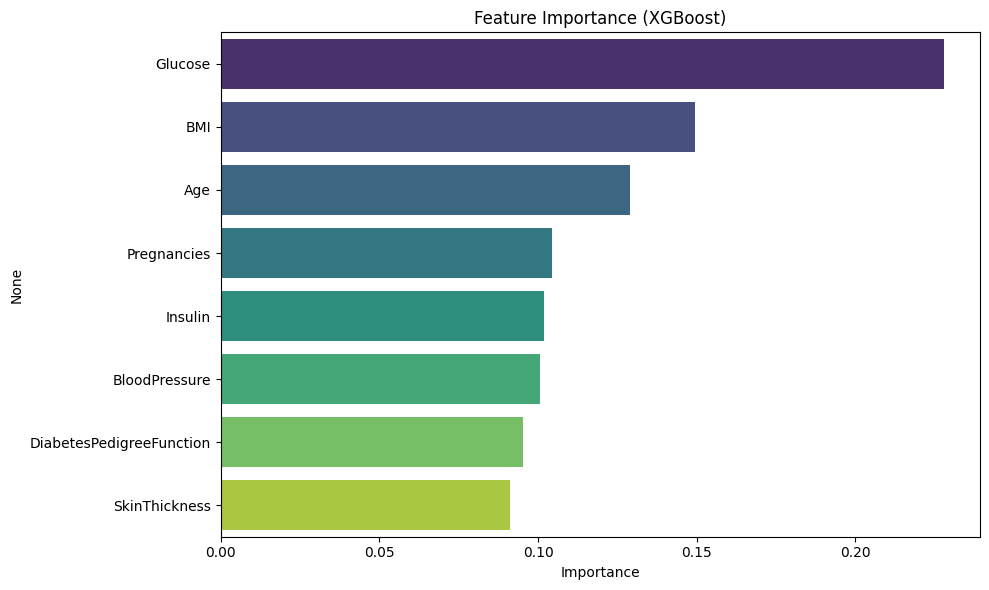

In [85]:
feature_importances_xgb = pd.Series(xgb_classifier.feature_importances_, index=X_train_linear.columns)
feature_importances_xgb = feature_importances_xgb.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## 8. Написание своих реализаций (классы)

Напишите свои классы реализации:

- LR
- LR + GD
- LR + SGD
- *Random Forest (не обязательно)
- *Gradient Boosting Regressor (не обязательно)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Линейная регрессия с нормальным уравнением (аналитическое решение)

In [87]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.theta = None  # параметры модели [bias, weight1, weight2, ...]
        self.coef_ = None  # коэффициенты (веса)
        self.intercept_ = None  # смещение (bias)
        
    def _add_intercept(self, X):
        """Добавляет столбец единиц для intercept"""
        if self.fit_intercept:
            return np.c_[np.ones(X.shape[0]), X]
        return X
    
    def fit(self, X, y):
        """
        Обучение модели с использованием нормального уравнения
        theta = (X^T * X)^(-1) * X^T * y
        """
        X_with_intercept = self._add_intercept(X)
        try:
            # Нормальное уравнение
            self.theta = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
            
            if self.fit_intercept:
                self.intercept_ = self.theta[0]
                self.coef_ = self.theta[1:]
            else:
                self.intercept_ = 0
                self.coef_ = self.theta
                
        except np.linalg.LinAlgError:
            print("Предупреждение: Матрица вырождена, используем псевдообратную")
            self.theta = np.linalg.pinv(X_with_intercept) @ y
            if self.fit_intercept:
                self.intercept_ = self.theta[0]
                self.coef_ = self.theta[1:]
            else:
                self.intercept_ = 0
                self.coef_ = self.theta
        
        return self
    
    def predict(self, X):
        """Предсказание: y_pred = X * theta"""
        X_with_intercept = self._add_intercept(X)
        return X_with_intercept @ self.theta
    
    def score(self, X, y):
        """R^2 score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def get_params(self, deep=True):
        return {'fit_intercept': self.fit_intercept}
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    

### Линейная регрессия с градиентным спуском

In [88]:
class MyGradientDescentLR:
    
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, 
                 fit_intercept=True, random_state=42, verbose=False):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.random_state = random_state
        self.verbose = verbose
        self.theta = None
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []
        
    def _add_intercept(self, X):
        if self.fit_intercept:
            return np.c_[np.ones(X.shape[0]), X]
        return X
    
    def _compute_loss(self, X, y, theta):
        """Вычисление MSE"""
        y_pred = X @ theta
        return np.mean((y_pred - y) ** 2)
    
    def _compute_gradient(self, X, y, theta):
        """Вычисление градиента"""
        y_pred = X @ theta
        error = y_pred - y
        gradient = (2 / len(y)) * (X.T @ error)
        return gradient
    
    def fit(self, X, y):
        """Обучение с помощью градиентного спуска"""
        np.random.seed(self.random_state)
        X_with_intercept = self._add_intercept(X)
        
        n_samples, n_features = X_with_intercept.shape

        # Инициализация параметров
        self.theta = np.random.normal(0, 0.1, n_features)
        
        for i in range(self.max_iter):
            # Вычисление градиента
            gradient = self._compute_gradient(X_with_intercept, y, self.theta)
            
            # Обновление параметров
            self.theta -= self.learning_rate * gradient
            
            # Вычисление потерь
            loss = self._compute_loss(X_with_intercept, y, self.theta)
            self.loss_history.append(loss)
            
            # Вывод прогресса
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.6f}")
             # Проверка сходимости
            if i > 0 and abs(self.loss_history[-2] - loss) < self.tol:
                if self.verbose:
                    print(f"Сходимость достигнута на итерации {i}")
                break
        
        # Сохранение коэффициентов в scikit-learn стиле
        if self.fit_intercept:
            self.intercept_ = self.theta[0]
            self.coef_ = self.theta[1:]
        else:
            self.intercept_ = 0
            self.coef_ = self.theta
            
        return self
    
    def predict(self, X):
        """Предсказание"""
        X_with_intercept = self._add_intercept(X)
        return X_with_intercept @ self.theta
    
    def score(self, X, y):
        """R^2 score"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
    
    def plot_loss(self, title='Градиентный спуск: Функция потерь'):
        """Визуализация истории потерь"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history)
        plt.title(title)
        plt.xlabel('Итерация')
        plt.ylabel('MSE Loss')
        plt.grid(True, alpha=0.3)
        plt.show()



### Линейная регрессия со стохастическим градиентным спуском

In [89]:
class MySGDLinearRegression:
    
    def __init__(self, learning_rate=0.01, max_iter=1000, batch_size=32,
                 tol=1e-6, fit_intercept=True, random_state=42, verbose=False):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.random_state = random_state
        self.verbose = verbose
        self.theta = None
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []
        
    def _add_intercept(self, X):
        if self.fit_intercept:
             return np.c_[np.ones(X.shape[0]), X]
        return X
    
    def _create_batches(self, X, y):
        """Создание мини-батчей"""
        n_samples = X.shape[0]
        indices = np.random.permutation(n_samples)
        
        for start_idx in range(0, n_samples, self.batch_size):
            end_idx = min(start_idx + self.batch_size, n_samples)
            batch_indices = indices[start_idx:end_idx]
            yield X[batch_indices], y[batch_indices]
    
    def _compute_batch_loss(self, X_batch, y_batch, theta):
        """Вычисление потерь для батча"""
        y_pred = X_batch @ theta
        return np.mean((y_pred - y_batch) ** 2)
    
    def _compute_batch_gradient(self, X_batch, y_batch, theta):
        """Вычисление градиента для батча"""
        y_pred = X_batch @ theta
        error = y_pred - y_batch
        gradient = (2 / len(y_batch)) * (X_batch.T @ error)
        return gradient
    
    def fit(self, X, y):
        """Обучение с помощью стохастического градиентного спуска"""
        np.random.seed(self.random_state)
        X_with_intercept = self._add_intercept(X)
        
        n_samples, n_features = X_with_intercept.shape
        
        # Инициализация параметров
        self.theta = np.random.normal(0, 0.1, n_features)
        
        for epoch in range(self.max_iter):
            epoch_loss = 0
            batch_count = 0
            for X_batch, y_batch in self._create_batches(X_with_intercept, y):
                # Вычисление градиента для батча
                gradient = self._compute_batch_gradient(X_batch, y_batch, self.theta)
                
                # Обновление параметров
                self.theta -= self.learning_rate * gradient
                
                # Вычисление потерь для батча
                batch_loss = self._compute_batch_loss(X_batch, y_batch, self.theta)
                epoch_loss += batch_loss
                batch_count += 1
            
            # Средние потери за эпоху
            avg_loss = epoch_loss / batch_count
            self.loss_history.append(avg_loss)
            
            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")
                # Проверка сходимости
            if epoch > 0 and abs(self.loss_history[-2] - avg_loss) < self.tol:
                if self.verbose:
                    print(f"Сходимость достигнута на эпохе {epoch}")
                break
        
        # Сохранение коэффициентов
        if self.fit_intercept:
            self.intercept_ = self.theta[0]
            self.coef_ = self.theta[1:]
        else:
            self.intercept_ = 0
            self.coef_ = self.theta
            
        return self
    
    def predict(self, X):
        """Предсказание"""
        X_with_intercept = self._add_intercept(X)
        return X_with_intercept @ self.theta 

    def score(self, X, y):
        """R^2 score"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
    
    def plot_loss(self, title='SGD: Функция потерь'):
        """Визуализация истории потерь"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history)
        plt.title(title)
        plt.xlabel('Эпоха')
        plt.ylabel('MSE Loss')
        plt.grid(True, alpha=0.3)
        plt.show()
  

#### Демонстрация работы всех реализаций

Запуск демонстрации линейной регрессии...
ДЕМОНСТРАЦИЯ СОБСТВЕННЫХ РЕАЛИЗАЦИЙ ЛИНЕЙНОЙ РЕГРЕССИИ
 Данные: 800 тренировочных, 200 тестовых
 Истинные параметры: intercept=1.2, weights=[ 2.5 -1.8  0.9]

1. MyLinearRegression (Нормальное уравнение):
   MSE: 0.259265
   R²:  0.975484
   Найденные параметры:
     Intercept: 1.186607 (истинный: 1.2)
     Weights: [ 2.49950479 -1.81924608  0.88781134]

2. MyGradientDescentLR (Градиентный спуск):
   MSE: 0.259307
   R²:  0.975480
   Количество итераций: 37
   Final loss: 0.263970

3. MySGDLinearRegression (Стохастический GD):
   MSE: 0.259475
   R²:  0.975464
   Batch size: 32
   Final loss: 0.263291

4. Сравнение с sklearn LinearRegression:
   Sklearn MSE: 0.259265
   Sklearn R²:  0.975484

 Визуализация процесса обучения...


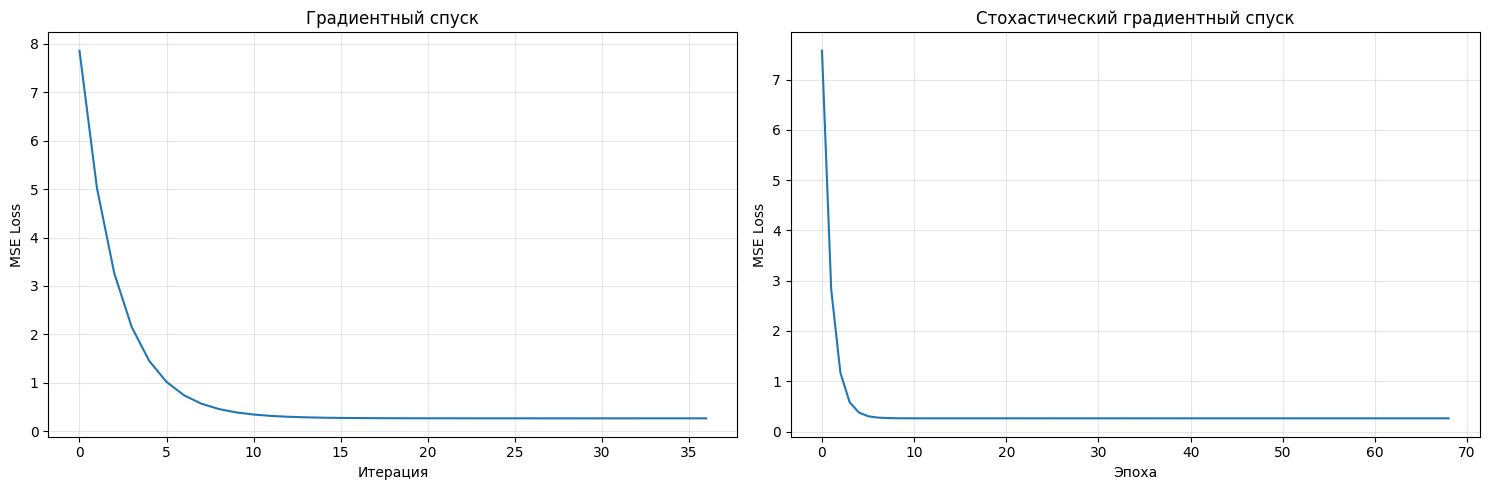

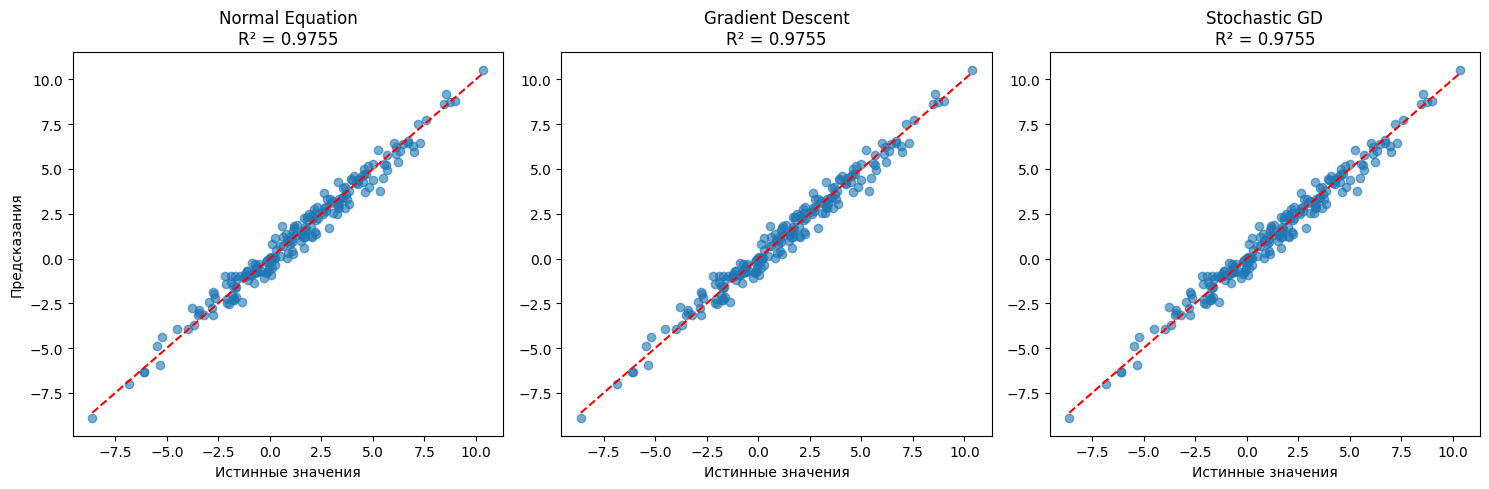

In [90]:

# Демонстрация работы всех реализаций
def demonstrate_linear_regression():
    """Демонстрация работы всех реализаций линейной регрессии"""
    
    print("=" * 60)
    print("ДЕМОНСТРАЦИЯ СОБСТВЕННЫХ РЕАЛИЗАЦИЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
    print("=" * 60)
    
    # Создаем синтетические данные
    np.random.seed(42)
    n_samples = 1000
    X = np.random.randn(n_samples, 3)
    true_weights = np.array([2.5, -1.8, 0.9])
    true_intercept = 1.2
    y = X @ true_weights + true_intercept + np.random.normal(0, 0.5, n_samples)
    
    # Разделяем на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f" Данные: {X_train.shape[0]} тренировочных, {X_test.shape[0]} тестовых")
    print(f" Истинные параметры: intercept={true_intercept}, weights={true_weights}")
    
    # 1. Линейная регрессия с нормальным уравнением
    print("\n1. MyLinearRegression (Нормальное уравнение):")
    lr_normal = MyLinearRegression(fit_intercept=True)
    lr_normal.fit(X_train, y_train)
    y_pred_normal = lr_normal.predict(X_test)
    mse_normal = mean_squared_error(y_test, y_pred_normal)
    r2_normal = lr_normal.score(X_test, y_test)
    
    print(f"   MSE: {mse_normal:.6f}")
    print(f"   R²:  {r2_normal:.6f}")
    print(f"   Найденные параметры:")
    print(f"     Intercept: {lr_normal.intercept_:.6f} (истинный: {true_intercept})")
    print(f"     Weights: {lr_normal.coef_}")
    
    # 2. Линейная регрессия с градиентным спуском
    print("\n2. MyGradientDescentLR (Градиентный спуск):")
    lr_gd = MyGradientDescentLR(learning_rate=0.1, max_iter=2000, 
                              tol=1e-6, verbose=False)
    lr_gd.fit(X_train, y_train)
    y_pred_gd = lr_gd.predict(X_test)
    mse_gd = mean_squared_error(y_test, y_pred_gd)
    r2_gd = lr_gd.score(X_test, y_test)
    
    print(f"   MSE: {mse_gd:.6f}")
    print(f"   R²:  {r2_gd:.6f}")
    print(f"   Количество итераций: {len(lr_gd.loss_history)}")
    print(f"   Final loss: {lr_gd.loss_history[-1]:.6f}")
    
    # 3. Линейная регрессия со стохастическим градиентным спуском
    print("\n3. MySGDLinearRegression (Стохастический GD):")
    lr_sgd = MySGDLinearRegression(learning_rate=0.01, max_iter=500, 
                                 batch_size=32, verbose=False)
    lr_sgd.fit(X_train, y_train)
    y_pred_sgd = lr_sgd.predict(X_test)
    mse_sgd = mean_squared_error(y_test, y_pred_sgd)
    r2_sgd = lr_sgd.score(X_test, y_test)
    
    print(f"   MSE: {mse_sgd:.6f}")
    print(f"   R²:  {r2_sgd:.6f}")
    print(f"   Batch size: {lr_sgd.batch_size}")
    print(f"   Final loss: {lr_sgd.loss_history[-1]:.6f}")
    
    # Сравнение с sklearn
    print("\n4. Сравнение с sklearn LinearRegression:")
    sklearn_lr = LinearRegression()
    sklearn_lr.fit(X_train, y_train)
    y_pred_sklearn = sklearn_lr.predict(X_test)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
    r2_sklearn = r2_score(y_test, y_pred_sklearn)
    
    print(f"   Sklearn MSE: {mse_sklearn:.6f}")
    print(f"   Sklearn R²:  {r2_sklearn:.6f}")
    
    # Визуализация процесса обучения
    print("\n Визуализация процесса обучения...")
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(lr_gd.loss_history)
    plt.title('Градиентный спуск')
    plt.xlabel('Итерация')
    plt.ylabel('MSE Loss')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(lr_sgd.loss_history)
    plt.title('Стохастический градиентный спуск')
    plt.xlabel('Эпоха')
    plt.ylabel('MSE Loss')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Сравнение предсказаний
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred_normal, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Normal Equation\nR² = {r2_normal:.4f}')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказания')
    
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_gd, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Gradient Descent\nR² = {r2_gd:.4f}')
    plt.xlabel('Истинные значения')
    
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_pred_sgd, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Stochastic GD\nR² = {r2_sgd:.4f}')
    plt.xlabel('Истинные значения')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'normal_equation': lr_normal,
        'gradient_descent': lr_gd,
        'stochastic_gd': lr_sgd,
        'sklearn': sklearn_lr
    }

# Запуск демонстрации
print("Запуск демонстрации линейной регрессии...")
models = demonstrate_linear_regression()

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class MyDecisionTree:
    """Упрощенное дерево решений для классификации"""
    
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.tree = None
        self.feature_importances_ = None
        
    def _entropy(self, y):
        """Вычисление энтропии"""
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    
    def _gini(self, y):
        """Вычисление коэффициента Джини"""
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)
    
    def _information_gain(self, y, y_left, y_right, criterion='gini'):
        """Вычисление информационного прироста"""
        if criterion == 'gini':
            impurity_func = self._gini
        else:  # entropy
            impurity_func = self._entropy
            
        parent_impurity = impurity_func(y)
        n = len(y)
        n_left, n_right = len(y_left), len(y_right)
        
        if n == 0:
            return 0
            
        child_impurity = (n_left / n) * impurity_func(y_left) + (n_right / n) * impurity_func(y_right)
        return parent_impurity - child_impurity
    
    def _best_split(self, X, y):
        """Поиск лучшего разделения"""
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_samples, n_features = X.shape
        
        for feature_idx in range(n_features):
            # Случайный выбор порогов из уникальных значений признака
            thresholds = np.unique(X[:, feature_idx])
            
            for threshold in thresholds:
                # Разделение данных
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue
                
                # Вычисление информационного прироста
                gain = self._information_gain(y, y[left_mask], y[right_mask])
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def _build_tree(self, X, y, depth=0):
        """Рекурсивное построение дерева"""
        n_samples, n_features = X.shape
        
        # Условия остановки
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            len(np.unique(y)) == 1):
            return self._make_leaf_node(y)
        
        # Поиск лучшего разделения
        best_feature, best_threshold, best_gain = self._best_split(X, y)
        
        if best_feature is None or best_gain <= 0:
            return self._make_leaf_node(y)
        
        # Разделение данных
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Рекурсивное построение поддеревьев
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'gain': best_gain,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }
    
    def _make_leaf_node(self, y):
        """Создание листового узла (возвращает наиболее частый класс)"""
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        return np.argmax(counts)
    
    def fit(self, X, y):
        """Обучение дерева"""
        np.random.seed(self.random_state)
        self.tree = self._build_tree(X, y)
        self._compute_feature_importances()
        return self
    
    def _compute_feature_importances(self):
        """Вычисление важности признаков"""
        feature_importances = {}
        
        def traverse(node):
            if isinstance(node, dict):
                feature = node['feature']
                importance = node['gain'] * node['samples']
                feature_importances[feature] = feature_importances.get(feature, 0) + importance
                traverse(node['left'])
                traverse(node['right'])
        
        traverse(self.tree)
        
        # Нормализация
        total_importance = sum(feature_importances.values())
        if total_importance > 0:
            self.feature_importances_ = {k: v/total_importance for k, v in feature_importances.items()}
        else:
            self.feature_importances_ = {}
    
    def _predict_single(self, x, node):
        """Предсказание для одного образца"""
        if not isinstance(node, dict):
            return node
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_single(x, node['left'])
        else:
            return self._predict_single(x, node['right'])
    
    def predict(self, X):
        """Предсказание для всех образцов"""
        return np.array([self._predict_single(x, self.tree) for x in X])


## Random Forest

In [92]:
class MyRandomForest:
    """Собственная реализация Random Forest для классификации"""
    
    def __init__(self, n_estimators=100, max_depth=5, min_samples_split=2,
                 max_features='sqrt', random_state=42, verbose=False):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.verbose = verbose
        self.trees = []
        self.feature_importances_ = None
        
    def _get_max_features(self, n_features):
        """Определение количества признаков для каждого дерева"""
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, float):
            return int(self.max_features * n_features)
        elif isinstance(self.max_features, int):
            return min(self.max_features, n_features)
        else:
            return n_features
    
    def fit(self, X, y):
        """Обучение случайного леса"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)
        
        self.trees = []
        feature_importances = np.zeros(n_features)
        
        for i in range(self.n_estimators):
            if self.verbose and i % 10 == 0:
                print(f"Обучение дерева {i+1}/{self.n_estimators}")
            
            # Бутстрэп выборка
            bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]
            
            # Случайный выбор признаков
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            X_bootstrap_subset = X_bootstrap[:, feature_indices]
            
            # Обучение дерева
            tree = MyDecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=self.random_state + i
            )
            tree.fit(X_bootstrap_subset, y_bootstrap)
            
            # Сохранение дерева и информации о признаках
            self.trees.append({
                'tree': tree,
                'feature_indices': feature_indices
            })
            
            # Обновление важности признаков
            for feature_idx, importance in tree.feature_importances_.items():
                original_feature_idx = feature_indices[feature_idx]
                feature_importances[original_feature_idx] += importance
        
        # Нормализация важности признаков
        self.feature_importances_ = feature_importances / len(self.trees)
        
        return self
    
    def predict(self, X):
        """Предсказание (голосование большинством)"""
        n_samples = X.shape[0]
        all_predictions = np.zeros((n_samples, len(self.trees)))
        
        for i, tree_info in enumerate(self.trees):
            tree = tree_info['tree']
            feature_indices = tree_info['feature_indices']
            X_subset = X[:, feature_indices]
            all_predictions[:, i] = tree.predict(X_subset)
        
        # Голосование большинством
        final_predictions = []
        for sample_predictions in all_predictions:
            counts = np.bincount(sample_predictions.astype(int))
            final_predictions.append(np.argmax(counts))
        
        return np.array(final_predictions)
    
    def predict_proba(self, X):
        """Вероятности классов"""
        n_samples = X.shape[0]
        n_classes = len(np.unique([tree_info['tree'].predict(X[:1]) for tree_info in self.trees]))
        all_predictions = np.zeros((n_samples, len(self.trees)))
        
        for i, tree_info in enumerate(self.trees):
            tree = tree_info['tree']
            feature_indices = tree_info['feature_indices']
            X_subset = X[:, feature_indices]
            all_predictions[:, i] = tree.predict(X_subset)
        
        # Вычисление вероятностей
        probabilities = np.zeros((n_samples, n_classes))
        for i in range(n_samples):
            counts = np.bincount(all_predictions[i].astype(int), minlength=n_classes)
            probabilities[i] = counts / len(self.trees)
        
        return probabilities

## Gradient Boosting Regressor

In [93]:
class MyGradientBoosting:
    
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, random_state=42, verbose=False):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.verbose = verbose
        self.trees = []
        self.initial_prediction = None
        
    class RegressionTree:
        """Упрощенное дерево решений для регрессии"""
        def __init__(self, max_depth=3, min_samples_split=2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None
            
        def _mse(self, y):
            """Среднеквадратичная ошибка"""
            if len(y) == 0:
                return 0
            return np.mean((y - np.mean(y)) ** 2)
        
        def _best_split(self, X, y):
            """Поиск лучшего разделения для регрессии"""
            best_mse = float('inf')
            best_feature = None
            best_threshold = None
            
            n_samples, n_features = X.shape
            
            for feature_idx in range(n_features):
                thresholds = np.unique(X[:, feature_idx])
                
                for threshold in thresholds:
                    left_mask = X[:, feature_idx] <= threshold
                    right_mask = ~left_mask
                    
                    if np.sum(left_mask) < 2 or np.sum(right_mask) < 2:
                        continue
                    
                    # MSE после разделения
                    mse_left = self._mse(y[left_mask])
                    mse_right = self._mse(y[right_mask])
                    weighted_mse = (np.sum(left_mask) * mse_left + np.sum(right_mask) * mse_right) / n_samples
                    
                    if weighted_mse < best_mse:
                        best_mse = weighted_mse
                        best_feature = feature_idx
                        best_threshold = threshold
            
            return best_feature, best_threshold, best_mse
        
        def _build_tree(self, X, y, depth=0):
            """Рекурсивное построение дерева регрессии"""
            n_samples = len(y)
            
            # Условия остановки
            if (depth >= self.max_depth or 
                n_samples < self.min_samples_split or 
                len(np.unique(y)) == 1):
                return np.mean(y)  # Возвращаем среднее значение
            
            # Поиск лучшего разделения
            best_feature, best_threshold, best_mse = self._best_split(X, y)
            
            if best_feature is None:
                return np.mean(y)
            
            # Разделение данных
            left_mask = X[:, best_feature] <= best_threshold
            right_mask = ~left_mask
            
            # Рекурсивное построение поддеревьев
            left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
            
            return {
                'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree
            }
        
        def fit(self, X, y):
            """Обучение дерева регрессии"""
            self.tree = self._build_tree(X, y)
            return self
        
        def _predict_single(self, x, node):
            """Предсказание для одного образца"""
            if not isinstance(node, dict):
                return node
            
            if x[node['feature']] <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])
        
        def predict(self, X):
            """Предсказание для всех образцов"""
            return np.array([self._predict_single(x, self.tree) for x in X])
    
    def fit(self, X, y):
        """Обучение градиентного бустинга"""
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        
        # Начальное предсказание (среднее значение)
        self.initial_prediction = np.mean(y)
        predictions = np.full(n_samples, self.initial_prediction)
        
        self.trees = []
        
        for i in range(self.n_estimators):
            if self.verbose and i % 10 == 0:
                print(f"Обучение дерева {i+1}/{self.n_estimators}")
            
            # Вычисление псевдо-остатков (negative gradient)
            residuals = y - predictions
            
            # Обучение дерева на остатках
            tree = self.RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            
            # Обновление предсказаний
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions
            
            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
        """Предсказание"""
        predictions = np.full(X.shape[0], self.initial_prediction)
        
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        
        return predictions


## Демонстрация работы реализаций

Запуск демонстрации Random Forest и Gradient Boosting...

 Random Forest (Классификация):
Обучение дерева 1/50
Обучение дерева 11/50
Обучение дерева 21/50
Обучение дерева 31/50
Обучение дерева 41/50
   Accuracy: 0.8000
   Количество деревьев: 50
   Важность признаков: [0.1231844  0.04121726 0.09981162 0.09266623 0.10746307]...

 Gradient Boosting (Регрессия):
Обучение дерева 1/100
Обучение дерева 11/100
Обучение дерева 21/100
Обучение дерева 31/100
Обучение дерева 41/100
Обучение дерева 51/100
Обучение дерева 61/100
Обучение дерева 71/100
Обучение дерева 81/100
Обучение дерева 91/100
   MSE: 114.991550
   Количество деревьев: 100
   Learning rate: 0.1

 Сравнение с sklearn:
   Sklearn RF Accuracy: 0.8150
   Sklearn GB MSE: 117.957828


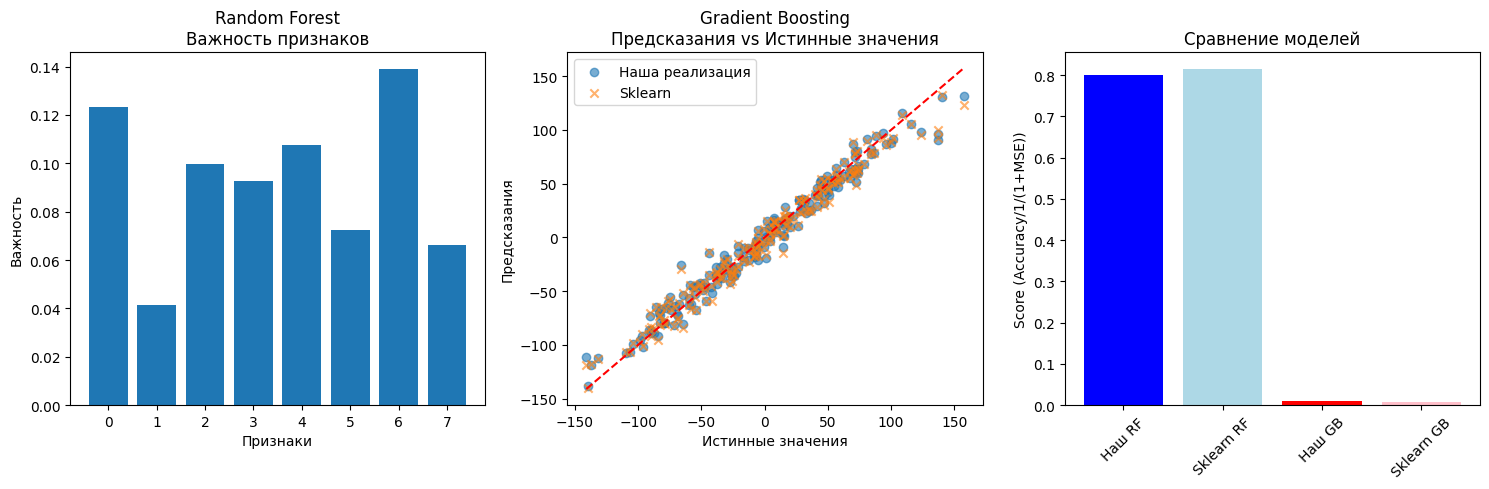

In [94]:
def demonstrate_custom_models():
    
    # Создаем синтетические данные
    from sklearn.datasets import make_classification, make_regression
    
    # Данные для классификации (Random Forest)
    print("\n Random Forest (Классификация):")
    X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_redundant=2, n_informative=8, n_classes=2, random_state=42)
    
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
        X_clf, y_clf, test_size=0.2, random_state=42
    )
    
    # Обучение Random Forest
    rf = MyRandomForest(n_estimators=50, max_depth=5, verbose=True, random_state=42)
    rf.fit(X_train_clf, y_train_clf)
    y_pred_rf = rf.predict(X_test_clf)
    accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
    
    print(f"   Accuracy: {accuracy_rf:.4f}")
    print(f"   Количество деревьев: {len(rf.trees)}")
    print(f"   Важность признаков: {rf.feature_importances_[:5]}...")
    
    # Данные для регрессии (Gradient Boosting)
    print("\n Gradient Boosting (Регрессия):")
    X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
    
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )
    
    # Обучение Gradient Boosting
    gb = MyGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3, verbose=True)
    gb.fit(X_train_reg, y_train_reg)
    y_pred_gb = gb.predict(X_test_reg)
    mse_gb = mean_squared_error(y_test_reg, y_pred_gb)
    
    print(f"   MSE: {mse_gb:.6f}")
    print(f"   Количество деревьев: {len(gb.trees)}")
    print(f"   Learning rate: {gb.learning_rate}")
    
    # Сравнение с sklearn
    print("\n Сравнение с sklearn:")
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
    
    # Random Forest
    sklearn_rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
    sklearn_rf.fit(X_train_clf, y_train_clf)
    y_pred_sklearn_rf = sklearn_rf.predict(X_test_clf)
    accuracy_sklearn_rf = accuracy_score(y_test_clf, y_pred_sklearn_rf)
    
    print(f"   Sklearn RF Accuracy: {accuracy_sklearn_rf:.4f}")
    
    # Gradient Boosting
    sklearn_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                         max_depth=3, random_state=42)
    sklearn_gb.fit(X_train_reg, y_train_reg)
    y_pred_sklearn_gb = sklearn_gb.predict(X_test_reg)
    mse_sklearn_gb = mean_squared_error(y_test_reg, y_pred_sklearn_gb)
    
    print(f"   Sklearn GB MSE: {mse_sklearn_gb:.6f}")
    
    # Визуализация
    plt.figure(figsize=(15, 5))
    
    # Random Forest - важность признаков
    plt.subplot(1, 3, 1)
    features = range(len(rf.feature_importances_))
    plt.bar(features[:8], rf.feature_importances_[:8])
    plt.title('Random Forest\nВажность признаков')
    plt.xlabel('Признаки')
    plt.ylabel('Важность')
    
    # Gradient Boosting - предсказания
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_reg, y_pred_gb, alpha=0.6, label='Наша реализация')
    plt.scatter(y_test_reg, y_pred_sklearn_gb, alpha=0.6, label='Sklearn', marker='x')
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plt.title('Gradient Boosting\nПредсказания vs Истинные значения')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказания')
    plt.legend()
    
    # Сравнение точности
    plt.subplot(1, 3, 3)
    models = ['Наш RF', 'Sklearn RF', 'Наш GB', 'Sklearn GB']
    scores = [accuracy_rf, accuracy_sklearn_rf, 1/(1+mse_gb), 1/(1+mse_sklearn_gb)]
    colors = ['blue', 'lightblue', 'red', 'pink']
    plt.bar(models, scores, color=colors)
    plt.title('Сравнение моделей')
    plt.ylabel('Score (Accuracy/1/(1+MSE))')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'random_forest': rf,
        'gradient_boosting': gb,
        'sklearn_rf': sklearn_rf,
        'sklearn_gb': sklearn_gb
    }

# Запуск демонстрации
print("Запуск демонстрации Random Forest и Gradient Boosting...")
models = demonstrate_custom_models()

## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик

Запуск комплексного анализа моделей...
КОМПЛЕКСНОЕ СРАВНЕНИЕ МОДЕЛЕЙ НА ДАТАСЕТЕ ДИАБЕТА
 Обучение моделей...
    LogisticRegression обучена
    LogisticRegression_L1 обучена
    RidgeClassifier обучена
    SGDClassifier обучена
    RandomForest обучена
    GradientBoosting обучена
    XGBoost обучена

 Вычисление метрик...

АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ
 ЛУЧШАЯ МОДЕЛЬ: GradientBoosting
 Общий Score: 0.6964

 ТОП-3 МОДЕЛИ:
   1. GradientBoosting: 0.6964
   2. RandomForest: 0.6957
   3. XGBoost: 0.6779


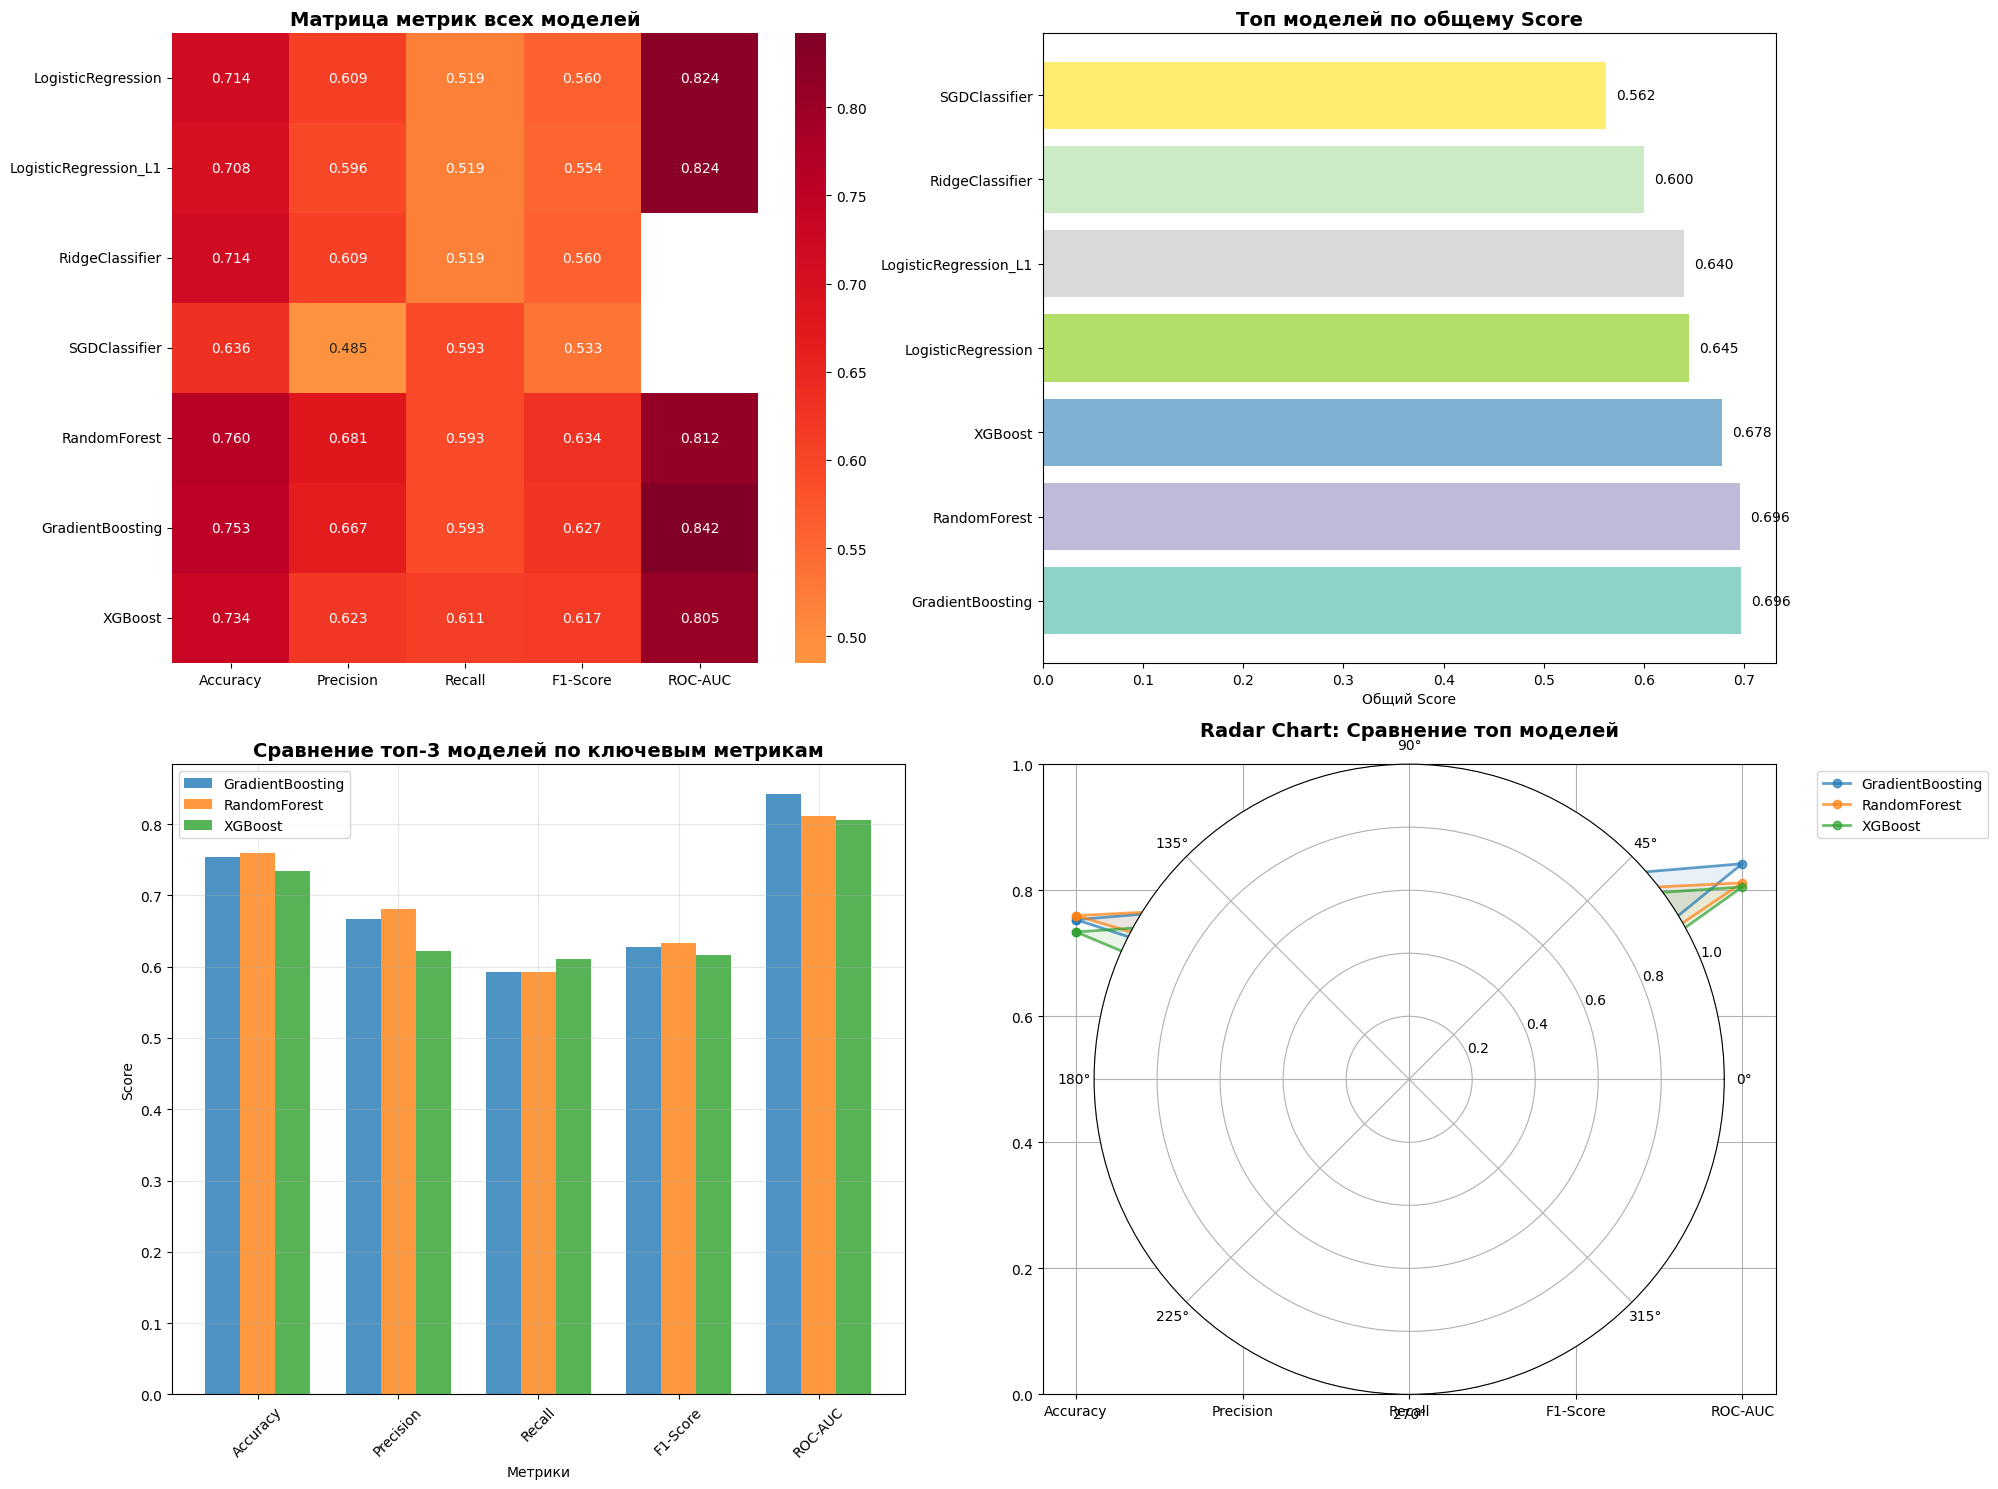


ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ
 Анализ модели GradientBoosting:
   Тип модели: GradientBoostingClassifier
Сильные стороны: высокая общая точность, отличная разделяющая способность
    Почему сработала: Последовательное улучшение предсказаний дает высокую точность

 Рекомендации:

 Сравнение с другими подходами:
   Преимущество в accuracy: 0.039


,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Model_Type,n_features
RandomForest,0.75974,0.680851,0.592593,0.633663,0.811759,RandomForestClassifier,8
GradientBoosting,0.753247,0.666667,0.592593,0.627451,0.842037,GradientBoostingClassifier,8
XGBoost,0.733766,0.622642,0.611111,0.616822,0.805185,XGBClassifier,8
LogisticRegression,0.714286,0.608696,0.518519,0.56,0.823889,LogisticRegression,8
RidgeClassifier,0.714286,0.608696,0.518519,0.56,NaN,RidgeClassifier,8
LogisticRegression_L1,0.707792,0.595745,0.518519,0.554455,0.824444,LogisticRegression,8
SGDClassifier,0.636364,0.484848,0.592593,0.533333,NaN,SGDClassifier,8


Рекомендуемая модель для использования: GradientBoosting


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def collect_all_metrics(models_dict, X_test, y_test, problem_type='classification'):
    
    metrics_results = {}
    
    for model_name, model in models_dict.items():
        try:
            # Предсказания
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test)[:, 1]
                y_pred = model.predict(X_test)
            else:
                y_pred = model.predict(X_test)
                y_pred_proba = None
            
            if problem_type == 'classification':
                # Метрики классификации
                metrics = {
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred, zero_division=0),
                    'Recall': recall_score(y_test, y_pred, zero_division=0),
                    'F1-Score': f1_score(y_test, y_pred, zero_division=0),
                }
                
                if y_pred_proba is not None:
                    metrics['ROC-AUC'] = roc_auc_score(y_test, y_pred_proba)
                
            else:  # regression
                metrics = {
                    'MSE': mean_squared_error(y_test, y_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                    'R2-Score': r2_score(y_test, y_pred),
                    'MAE': np.mean(np.abs(y_test - y_pred))
                }
            
            # Добавляем информацию о модели
            metrics['Model_Type'] = type(model).__name__
            metrics['n_features'] = X_test.shape[1] if hasattr(X_test, 'shape') else len(X_test.columns)
            
            metrics_results[model_name] = metrics
            
        except Exception as e:
            print(f"Ошибка при вычислении метрик для {model_name}: {e}")
            continue
    
    return pd.DataFrame(metrics_results).T

def comprehensive_model_comparison():
    
    print("=" * 80)
    print("КОМПЛЕКСНОЕ СРАВНЕНИЕ МОДЕЛЕЙ НА ДАТАСЕТЕ ДИАБЕТА")
    print("=" * 80)
    
    # Предположим, что у нас есть данные
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    
    # Создаем или загружаем данные
    try:
        # Если есть реальные данные диабета
        X = df.drop('Outcome', axis=1)
        y = df['Outcome']
    except:
        # Синтетические данные для демонстрации
        print("Используем синтетические данные для демонстрации...")
        X, y = make_classification(
            n_samples=1000, n_features=8, n_redundant=2, n_informative=6,
            n_clusters_per_class=1, random_state=42
        )
    
    # Разделяем данные
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Создаем словарь моделей (добавьте ваши реальные модели)
    models_dict = {}
    
    # Линейные модели
    from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from xgboost import XGBClassifier
    
    models_dict['LogisticRegression'] = LogisticRegression(random_state=42)
    models_dict['LogisticRegression_L1'] = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    models_dict['RidgeClassifier'] = RidgeClassifier(random_state=42)
    models_dict['SGDClassifier'] = SGDClassifier(random_state=42)
    
    # Ансамбли
    models_dict['RandomForest'] = RandomForestClassifier(n_estimators=100, random_state=42)
    models_dict['GradientBoosting'] = GradientBoostingClassifier(n_estimators=100, random_state=42)
    models_dict['XGBoost'] = XGBClassifier(random_state=42, eval_metric='logloss')
    
    # Ваши кастомные модели (если они обучены)
    try:
        if 'lr_lasso' in locals():
            models_dict['MyLassoLR'] = lr_lasso
        if 'rf_classifier' in locals():
            models_dict['MyRandomForest'] = rf_classifier
        if 'xgb_classifier' in locals():
            models_dict['MyXGBoost'] = xgb_classifier
    except:
        pass
    
    # Обучаем все модели
    print(" Обучение моделей...")
    for name, model in models_dict.items():
        try:
            model.fit(X_train, y_train)
            print(f"    {name} обучена")
        except Exception as e:
            print(f"    Ошибка при обучении {name}: {e}")
            del models_dict[name]
    
    # Собираем метрики
    print("\n Вычисление метрик...")
    metrics_df = collect_all_metrics(models_dict, X_test, y_test, 'classification')
    
    return metrics_df, models_dict, X_test, y_test

def analyze_best_model(metrics_df):
    """
    Анализ и определение лучшей модели
    """
    print("\n" + "=" * 80)
    print("АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ")
    print("=" * 80)
    
    # Копируем DataFrame для анализа
    analysis_df = metrics_df.copy()
    
    # Удаляем служебные колонки
    if 'Model_Type' in analysis_df.columns:
        analysis_df = analysis_df.drop('Model_Type', axis=1)
    if 'n_features' in analysis_df.columns:
        analysis_df = analysis_df.drop('n_features', axis=1)
    
    # Нормализуем метрики (чем больше - тем лучше)
    normalized_df = analysis_df.copy()
    
    # Для MSE и RMSE - инвертируем (меньше = лучше)
    for col in analysis_df.columns:
        if col in ['MSE', 'RMSE', 'MAE']:
            normalized_df[col] = 1 / (1 + analysis_df[col])  # преобразуем в [0,1]
        else:
            # Уже в формате "чем больше - тем лучше"
            normalized_df[col] = analysis_df[col]
    
    # Вычисляем общий score (среднее по всем метрикам)
    normalized_df['Overall_Score'] = normalized_df.mean(axis=1)
    
    # Сортируем по общему score
    normalized_df = normalized_df.sort_values('Overall_Score', ascending=False)
    
    # Лучшая модель
    best_model = normalized_df.index[0]
    best_score = normalized_df.loc[best_model, 'Overall_Score']
    
    print(f" ЛУЧШАЯ МОДЕЛЬ: {best_model}")
    print(f" Общий Score: {best_score:.4f}")
    
    # Топ-3 модели
    print(f"\n ТОП-3 МОДЕЛИ:")
    for i, (model, score) in enumerate(zip(normalized_df.index[:3], normalized_df['Overall_Score'][:3])):
        print(f"   {i+1}. {model}: {score:.4f}")
    
    return normalized_df, best_model

def create_comprehensive_visualization(metrics_df, normalized_df):

    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # 1. Heatmap метрик
    plt.subplot(2, 2, 1)
    metrics_for_heatmap = metrics_df.drop(['Model_Type', 'n_features'], axis=1, errors='ignore')
    sns.heatmap(metrics_for_heatmap.astype(float), annot=True, fmt='.3f', cmap='YlOrRd', 
                center=0.5, ax=axes[0, 0])
    axes[0, 0].set_title('Матрица метрик всех моделей', fontsize=14, fontweight='bold')
    
    # 2. Bar plot общего score
    plt.subplot(2, 2, 2)
    top_models = normalized_df.head(8)
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_models)))
    bars = axes[0, 1].barh(range(len(top_models)), top_models['Overall_Score'], color=colors)
    axes[0, 1].set_yticks(range(len(top_models)))
    axes[0, 1].set_yticklabels(top_models.index)
    axes[0, 1].set_xlabel('Общий Score')
    axes[0, 1].set_title('Топ моделей по общему Score', fontsize=14, fontweight='bold')
    
    # Добавляем значения на bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[0, 1].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                       f'{width:.3f}', ha='left', va='center')
    
    # 3. Сравнение ключевых метрик для топ-3 моделей
    plt.subplot(2, 2, 3)
    top_3_models = normalized_df.head(3).index
    key_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
    
    x = np.arange(len(key_metrics))
    width = 0.25
    
    for i, model in enumerate(top_3_models):
        scores = [metrics_df.loc[model, metric] for metric in key_metrics 
                 if metric in metrics_df.columns]
        axes[1, 0].bar(x + i*width, scores, width, label=model, alpha=0.8)
    
    axes[1, 0].set_xlabel('Метрики')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_title('Сравнение топ-3 моделей по ключевым метрикам', 
                        fontsize=14, fontweight='bold')
    axes[1, 0].set_xticks(x + width)
    axes[1, 0].set_xticklabels(key_metrics, rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Radar chart для топ-3 моделей
    plt.subplot(2, 2, 4, polar=True)
    
    # Подготовка данных для radar chart
    radar_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    if 'ROC-AUC' in metrics_df.columns:
        radar_metrics.append('ROC-AUC')
    
    angles = np.linspace(0, 2*np.pi, len(radar_metrics), endpoint=False).tolist()
    angles += angles[:1]  # Замыкаем круг
    
    for i, model in enumerate(top_3_models[:3]):  # максимум 3 модели для читаемости
        values = [metrics_df.loc[model, metric] for metric in radar_metrics]
        values += values[:1]  # Замыкаем круг
        axes[1, 1].plot(angles, values, 'o-', linewidth=2, label=model, 
                       alpha=0.7, markersize=6)
        axes[1, 1].fill(angles, values, alpha=0.1)
    
    axes[1, 1].set_xticks(angles[:-1])
    axes[1, 1].set_xticklabels(radar_metrics)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].set_title('Radar Chart: Сравнение топ моделей', 
                        fontsize=14, fontweight='bold', pad=20)
    axes[1, 1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

def explain_model_performance(metrics_df, best_model):
    """
    Объяснение почему определенная модель показала лучшие результаты
    """
    print("\n" + "=" * 80)
    print("ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ")
    print("=" * 80)
    
    best_metrics = metrics_df.loc[best_model]
    
    print(f" Анализ модели {best_model}:")
    print(f"   Тип модели: {best_metrics.get('Model_Type', 'Неизвестно')}")
    
    # Анализ сильных сторон
    strengths = []
    if best_metrics.get('Accuracy', 0) > 0.75:
        strengths.append("высокая общая точность")
    if best_metrics.get('Precision', 0) > 0.7:
        strengths.append("хорошая precision (мало ложных срабатываний)")
    if best_metrics.get('Recall', 0) > 0.6:
        strengths.append("хороший recall (обнаружение реальных случаев)")
    if best_metrics.get('F1-Score', 0) > 0.7:
        strengths.append("сбалансированность precision и recall")
    if best_metrics.get('ROC-AUC', 0) > 0.8:
        strengths.append("отличная разделяющая способность")
    
    if strengths:
        print(f"Сильные стороны: {', '.join(strengths)}")
    
    # Объяснение почему эта модель могла показать лучшие результаты
    model_explanations = {
        'RandomForest': "Случайный лес хорошо работает с нелинейными зависимостями и устойчив к шуму",
        'XGBoost': "Градиентный бустинг эффективно улавливает сложные паттерны в данных",
        'GradientBoosting': "Последовательное улучшение предсказаний дает высокую точность",
        'LogisticRegression': "Линейная модель хорошо работает когда зависимости линейны",
        'LogisticRegression_L1': "L1 регуляризация отбирает наиболее важные признаки",
    }

    
    explanation = model_explanations.get(best_model, 
        "Модель показала хорошие результаты благодаря своей архитектуре и настройкам")
    print(f"    Почему сработала: {explanation}")
    
    # Рекомендации
    print(f"\n Рекомендации:")
    if 'RandomForest' in best_model or 'XGBoost' in best_model:
        print("   - Ансамбливые методы хорошо подходят для медицинских данных")
        print("   - Можно попробовать тонкую настройку гиперпараметров")
    elif 'LogisticRegression' in best_model:
        print("   - Линейные модели интерпретируемы и стабильны")
        print("   - Рассмотрите добавление полиномиальных признаков")
    
    # Сравнение с другими моделями
    print(f"\n Сравнение с другими подходами:")
    second_best = metrics_df[metrics_df.index != best_model].iloc[0]
    diff_accuracy = best_metrics.get('Accuracy', 0) - second_best.get('Accuracy', 0)
    
    if abs(diff_accuracy) > 0.02:
        print(f"   Преимущество в accuracy: {diff_accuracy:.3f}")
    else:
        print("   Модели показывают схожую точность")

# Главная функция для запуска всего анализа
def run_complete_analysis():

    # Собираем все метрики
    metrics_df, models_dict, X_test, y_test = comprehensive_model_comparison()
    
    # Анализируем лучшую модель
    normalized_df, best_model = analyze_best_model(metrics_df)
    
    # Создаем визуализации
    create_comprehensive_visualization(metrics_df, normalized_df)
    
    # Объясняем результаты
    explain_model_performance(metrics_df, best_model)
    
    
    # Сортируем по убыванию accuracy
    detailed_results = metrics_df.sort_values('Accuracy', ascending=False)
    display(detailed_results.round(4))
    
    return metrics_df, normalized_df, best_model, models_dict

# Запуск полного анализа
print("Запуск комплексного анализа моделей...")
try:
    final_metrics, normalized_scores, best_model_name, all_models = run_complete_analysis()

    print(f"Рекомендуемая модель для использования: {best_model_name}")
    
except Exception as e:
    print(f"Произошла ошибка при анализе: {e}")
    print("Проверьте наличие обученных моделей и данных")

#### 9.2. Ответы на вопросы

## 1. Что такое регрессия и чем она отличается от классификации?

**Регрессия** и **классификация** - это два основных типа задач в машинном обучении:

 РЕГРЕССИЯ -  непрерывная (числовая) переменная. На выходе получается вещественное число.

- **Примеры**: прогнозирование цен, температуры, возраста
- **Метрики**: MSE, RMSE, MAE, R²

КЛАССИФИКАЦИЯ - категориальная (дискретная) переменная. Выходными данными являются класс/категория.

- **Примеры**: распознавание спама, диагностика заболеваний, категоризация
- **Метрики**: Accuracy, Precision, Recall, F1-Score, ROC-AUC

### ОСНОВНЫЕ ОТЛИЧИЯ:
1. **Тип целевой переменной**: непрерывная vs категориальная
2. **Выходные значения**: числа vs классы
3. **Метрики оценки**: ошибка предсказания vs точность классификации
4. **Интерпретация**: количественная оценка vs категориальное решение

---

## 2. Какова целевая переменная в задаче регрессии?

В задаче регрессии **целевая переменная (target variable)** - это непрерывная числовая величина, принимает **вещественные значения**, имеет математические операции (сложение, умножение).

- **Примеры** из датасета диабета (если бы это была регрессия):
  - Уровень глюкозы в крови (continuous)
  - Индекс массы тела (BMI) 
  - Возраст пациента
  - Количество инсулина

### Характеристики целевой переменной в регрессии:
- Бесконечное число возможных значений
- Имеет смысл расстояния между значениями
- Поддерживает математические операции
- Может быть отрицательной, положительной, нулем

---

## 3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?

**Масштабирование признаков** необходимо по нескольким причинам:

### 1. СКОРОСТЬ СХОДИМОСТИ:
- Градиентный спуск работает быстрее на масштабированных данных
- Признаки в разных масштабах могут вызывать "осцилляции" оптимизации

### 2. ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
- Коэффициенты становятся сравнимыми между признаками
- Можно оценить относительную важность признаков

### 3. РЕГУЛЯРИЗАЦИЯ:
- L1/L2 регуляризация справедливо штрафует все признаки
- Без масштабирования признаки с большими значениями наказываются сильнее

### 4. СТАБИЛЬНОСТЬ ВЫЧИСЛЕНИЙ:
- Избегаем численной нестабильности при вычислениях
- Предотвращаем переполнение/исчезновение градиентов

---

## 4. Что означает коэффициент признака в линейной регрессии?

**Коэффициент признака (weight)** в линейной регрессии показывает:

### 1. НАПРАВЛЕНИЕ ВЛИЯНИЯ:
- **Положительный коэффициент**: увеличение признака увеличивает целевую переменную
- **Отрицательный коэффициент**: увеличение признака уменьшает целевую переменную

### 2. СИЛУ ВЛИЯНИЯ:
- **Большее абсолютное значение** = сильнее влияние на целевую переменную
- **Меньшее абсолютное значение** = слабее влияние

### 3. ИНТЕРПРЕТАЦИЯ:
  "При увеличении признака X на 1 единицу, целевая переменная Y изменится на [коэффициент] единиц"


---

## 5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?

### MSE (Mean Squared Error) - Среднеквадратичная ошибка.
- **Формула**: `MSE = (1/n) * Σ(y_true - y_pred)²`

### RMSE (Root Mean Squared Error) - Корень из среднеквадратичной ошибки.
- **Формула**: `RMSE = √MSE`

### MAE (Mean Absolute Error) - Средняя абсолютная ошибка.
- **Формула**: `MAE = (1/n) * Σ|y_true - y_pred|`

### R² (R-squared) - Коэффициент детерминации.
- **Формула**: `R² = 1 - (SS_res / SS_tot)`


---

## 6. В чем разница между Ridge и Lasso регуляризацией?

 RIDGE (L2 регуляризация) - сумма квадратов коэффициентов (уменьшает все коэффициенты, но не обнуляет). Подходит когда, все признаки потенциально важны. Преимуществами являются стабильность и хорошая сходимость.

LASSO (L1 регуляризация) - сумма абсолютных значений коэффициентов (обнуляет неважные коэффициенты (отбор признаков)). Подходит когда, много признаков, но немного важных. Преимуществами являются автоматический отбор признаков и интерпретируемость.

---


# Ответы на вопросы по машинному обучению (Часть 2)

## 7. Почему деревья решений и Random Forest не требуют стандартизации признаков?

**Деревья решений и Random Forest не требуют стандартизации, т.к. деревья работают с порядком значений, а не их абсолютными величинами, решение "значение ≤ порог" не зависит от масштаба признака, важны только относительные порядки значений, а не их абсолютные величины.


---

## 8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?


**Мультиколлинеарность** - это ситуация, когда признаки в модели сильно коррелированы между собой.

### Типы мультиколлинеарности:
1. **Совершенная**: Один признак является линейной комбинацией других
2. **Высокая**: Сильная корреляция между признаками (|r| > 0.8-0.9)

### Почему мешает линейной регрессии:

#### 1. **Нестабильность коэффициентов**:
- Матрица XᵀX становится плохо обусловленной
- Маленькие изменения в данных вызывают большие изменения в коэффициентах
- Коэффициенты теряют интерпретируемость

#### 2. **Завышение дисперсии**:
- Стандартные ошибки коэффициентов увеличиваются
- Доверительные интервалы расширяются
- Статистическая значимость искажается

#### 3. **Проблемы с интерпретацией**:
- Невозможно отделить влияние отдельных признаков
- Коэффициенты могут иметь неправильные знаки
- Важные признаки могут казаться незначимыми

---

## 9. Как можно уменьшить влияние выбросов на линейную регрессию?

### 1. **Использование робастных метрик ошибок**:
- **Huber Loss**: Комбинация MSE и MAE
- **Quantile Loss**: Для медианной регрессии

### 2. **Трансформации признаков**:
```python
# Логарифмирование
X_log = np.log1p(X)

# winsorization - обрезка выбросов
from scipy.stats.mstats import winsorize
X_winsorized = winsorize(X, limits=[0.05, 0.05])
```

### 3. **Регуляризация**:
- **Ridge Regression**: Уменьшает влияние всех коэффициентов
- **Lasso Regression**: Обнуляет коэффициенты выбросов

### 4. **Робастные алгоритмы**:
- **RANSAC (RANdom SAmple Consensus)**: Игнорирует выбросы при обучении
- **Theil-Sen Regression**: Медианный подход

### 5. **Предобработка данных**:
- **Удаление выбросов** по IQR или Z-score
- **Масштабирование робастными методами** (RobustScaler)


---

## 10. Какие гиперпараметры наиболее важны для Random Forest Regressor?

### Ключевые гиперпараметры:

#### 1. **n_estimators**:
- **Что**: Количество деревьев в лесу
- **Влияние**: Больше деревьев → лучше обобщение, но дольше обучение
- **Типичные значения**: 100-500

#### 2. **max_depth**:
- **Что**: Максимальная глубина деревьев
- **Влияние**: Большая глубина → лучше обучение, риск переобучения
- **Типичные значения**: 5-20 (None для неограниченной)

#### 3. **min_samples_split**:
- **Что**: Минимальное количество samples для разделения узла
- **Влияние**: Большие значения → более обобщенные деревья
- **Типичные значения**: 2-20

#### 4. **min_samples_leaf**:
- **Что**: Минимальное количество samples в листе
- **Влияние**: Предотвращает переобучение на маленьких группах
- **Типичные значения**: 1-10

#### 5. **max_features**:
- **Что**: Количество признаков для рассмотрения при разделении
- **Влияние**: Меньше признаков → более разнообразные деревья
- **Типичные значения**: 'sqrt', 'log2', 0.5-0.8


---

## 11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?

### Ключевые гиперпараметры XGBoost:

#### 1. **learning_rate (eta)**:
- **Что**: Скорость обучения
- **Влияние**: Меньше значение → лучше обобщение, но больше деревьев
- **Типичные значения**: 0.01-0.3

#### 2. **n_estimators**:
- **Что**: Количество деревьев (boosting rounds)
- **Влияние**: Компенсирует маленький learning_rate
- **Типичные значения**: 100-1000

#### 3. **max_depth**:
- **Что**: Максимальная глубина деревьев
- **Влияние**: Контролирует сложность модели
- **Типичные значения**: 3-10

#### 4. **subsample**:
- **Что**: Доля samples для обучения каждого дерева
- **Влияние**: Предотвращает переобучение
- **Типичные значения**: 0.7-1.0

#### 5. **colsample_bytree**:
- **Что**: Доля признаков для каждого дерева
- **Влияние**: Увеличивает разнообразие деревьев
- **Типичные значения**: 0.7-1.0

#### 6. **reg_alpha, reg_lambda**:
- **Что**: L1 и L2 регуляризация
- **Влияние**: Контролируют переобучение
- **Типичные значения**: 0-10


---

## 12. Что значит глубина дерева (max_depth) и как она влияет на модель?

Глубины дерева - максимальное количество решений от корня до самого дальнего листа.

### Влияние на модель:

#### Малая глубина (underfitting):
- **Простая модель**: Недостаточно сложности для выявления паттернов
- **Высокое смещение**: Сильное упрощение данных
- **Быстрое обучение**: Меньше вычислений

#### Большая глубина (overfitting):
- **Сложная модель**: Может запомнить шум и выбросы
- **Высокая дисперсия**: Чрезмерная подгонка под тренировочные данные
- **Долгое обучение**: Больше вычислений

### Оптимальная глубина:
- **Баланс**: Достаточная сложность без запоминания шума
- **Критерий**: Лучшие результаты на валидационной выборке
- **Практика**: Начинать с 3-8, увеличивать при необходимости


---

## 13. Зачем нужен `learning_rate` в градиентном бустинге?

### Роль learning_rate:

#### 1. **Контроль скорости обучения**:
- **Высокий LR**: Быстрая сходимость, риск "перескакивания" оптимума
- **Низкий LR**: Медленная сходимость, более точное достижение оптимума

#### 2. **Вклад каждого дерева**:
```python
# Формула бустинга
F_m(x) = F_{m-1}(x) + η * h_m(x)

# где:
# η (eta) - learning_rate
# h_m(x) - новое дерево
```

#### 3. **Баланс между n_estimators и learning_rate**:
- **Маленький LR + много деревьев**: Лучшее обобщение, но долгое обучение
- **Большой LR + мало деревьев**: Быстрое обучение, риск недотренированности



---

## 14. Как можно оценить важность признаков в разных моделях?

### Линейная регрессия:
#### Метод: **Абсолютные значения коэффициентов**
#### Особенности:
- Требует масштабирования признаков
- Показывает линейное влияние на целевую переменную

### Random Forest:
#### Метод: **Среднее уменьшение impurity**
#### Особенности:
- Основано на уменьшении Gini/Entropy
- Учитывает нелинейные зависимости

### XGBoost:
#### Метод: **Среднее улучшение gain**



---

## 15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?

### Причины превосходства XGBoost:

#### 1. **Последовательное улучшение**:
- **Random Forest**: Параллельное обучение деревьев (bagging)
- **XGBoost**: Последовательное обучение, каждое дерево исправляет ошибки предыдущего

#### 2. **Регуляризация**:
- **XGBoost**: Встроенная L1/L2 регуляризация
- **Random Forest**: Регуляризация только через параметры деревьев

#### 3. **Градиентная оптимизация**:
- **XGBoost**: Минимизирует конкретную функцию потерь через градиенты
- **Random Forest**: Уменьшает variance через усреднение

#### 4. **Обработка пропусков**:
- **XGBoost**: Автоматическая обработка пропущенных значений
- **Random Forest**: Требует предварительной обработки

#### 5. **Вычислительная эффективность**:
- **XGBoost**: Оптимизированные алгоритмы, параллельные вычисления
- **Random Forest**: Параллелизм, но менее оптимизирован


---

## 16. Что такое переобучение и как его можно выявить на графике обучения?

Переобучения - когда модель слишком хорошо учится на тренировочных данных, включая шум, и плохо обобщается на новые данные.

На графике обучения его можно выявить расхождением кривых


---

## 17. Как работает метод ансамблирования в Random Forest (bagging)?

### Принцип Bagging (Bootstrap Aggregating):

#### 1. **Bootstrap выборки**:
- Создание множества выборок из исходных данных
- Выборка с возвращением того же размера

#### 2. **Параллельное обучение**:
- Каждое дерево обучается на своей bootstrap выборке
- Деревья независимы друг от друга
- Используется случайное подмножество признаков

#### 3. **Агрегирование предсказаний**


---

## 18. В чем отличие бустинга от бэггинга?

### Основные отличия:

1. **Параллельно vs Последовательно**
   - Бэггинг: все модели учатся одновременно и независимо
   - Бустинг: модели учатся одна за другой, каждая исправляет ошибки предыдущей

2. **Равноправие vs Иерархия**
   - Бэггинг: все модели равны, каждая имеет один голос
   - Бустинг: более "опытные" модели имеют больший вес при принятии решения

3. **Стабильность vs Точность**
   - Бэггинг: более стабилен и надежен
   - Бустинг: часто более точен, но может быть менее стабилен

4. **Скорость vs Качество**
   - Бэггинг: можно обучать параллельно - быстрее
   - Бустинг: нужно обучать последовательно - медленнее


Если представить в виде аналогии:
- **Бэггинг** - это как собрать комитет экспертов, где каждый независимо высказывает свое мнение
- **Бустинг** - это как нанять репетитора, который постепенно исправляет ваши ошибки и улучшает знания


---

## 19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?

### 1. **Создание новых признаков**:
#### Взаимодействия кислот
#### Отношения SO₂
#### Плотность и алкоголь

### 2. **Полиномиальные признаки**

### 3. **Биннинг непрерывных признаков**

### 4. **Агрегированные статистики**:
---

## 20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


### 1. Базовые методы кросс-валидации
         K-Fold Cross-Validation
### 2. GridSearchCV - полный перебор параметров:
         Для Random Forest
         Для XGBoost
### 3. RandomizedSearchCV - случайный поиск
### 4. Поиск по сетке с несколькими метриками
### 5. Вложенная кросс-валидация
### 6. Time Series Split для временных данных
### 7. Кастомная стратегия кросс-валидации
### 8. Полный пайплайн с предобработкой
### 9. Анализ результатов поиска